In [1]:
%matplotlib inline
import time
import re

#data import libraries
import pandas as pd

#path libraries
from pathlib import Path
import os.path as osp

#math libraries
import math
import numpy as np
import scipy as sp
import scipy.stats as stats
from scipy.stats import norm

#plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


#sklearn libraries for data cleaning
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.preprocessing import StandardScaler #normalize your dataset
from sklearn.model_selection import train_test_split #split data to train and test data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler #normalize your dataset
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#sklearn library for linear regression
from sklearn.linear_model import LinearRegression

#sklearn libraries for regularized regression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

#sklearn library for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import BayesianRidge

#sklearn library for knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#sklearn libraries for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import _tree
from sklearn.tree import plot_tree

#sklearn libraries for data cleaning and cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler #normalize your dataset

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


#sklearn library for naive bayes
from sklearn.naive_bayes import GaussianNB

#sklearn library for support vector machine
from sklearn.svm import SVC

#sklearn library for neural networks
from sklearn.neural_network import MLPClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#LGBM
from lightgbm import LGBMClassifier

#optuna
import optuna
from optuna.samplers import TPESampler

#sklearn library for scores and errors
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import cohen_kappa_score, log_loss
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score


#feature selection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFECV, RFE

#imbalanced smotes
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler

#warnings 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import category_encoders as ce

In [2]:
vaccine_features = pd.read_csv("training_set_features.csv")

In [3]:
vaccine_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
vaccine_features.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [5]:
vaccine_features.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [6]:
vaccine_labels = pd.read_csv("training_set_labels.csv")

In [7]:
vaccine_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [8]:
vaccine_labels.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000
mean,13353.000000,0.212454,0.465608
std,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000
75%,20029.500000,0.000000,1.000000
max,26706.000000,1.000000,1.000000


In [9]:
vaccine_labels.dtypes

respondent_id       int64
h1n1_vaccine        int64
seasonal_vaccine    int64
dtype: object

In [10]:
vaccine = pd.merge(vaccine_features, vaccine_labels, on="respondent_id")

In [11]:
vaccine.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [12]:
vaccine.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [13]:
vaccine.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [14]:
# this is the function that plots the custom confusion matrix with the colors and labels 
def confusion_matrix_plotting(cm, title):
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 25},
            cmap=sns.color_palette(['tomato', 'palegreen']), cbar=False,
            yticklabels=['Vaccinated', 'Not Vaccinated'], xticklabels=['Vaccinated', 'Not Vaccinated'], ax=ax)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(labelsize=14, length=0)

    ax.set_title(title, size=18, pad=10)
    ax.set_xlabel('Predicted', size=14)
    ax.set_ylabel('Actual', size=14)

    additional_texts = ['(True Positive)', '(False Negative)', '(False Positive)', '(True Negative)']
    for text_elt, additional_text in zip(ax.texts, additional_texts):
        ax.text(*text_elt.get_position(), '\n' + additional_text, color=text_elt.get_color(),
            ha='center', va='top', size=12)
    plt.tight_layout()
    plt.show()

In [15]:
def plot_roc_curve(test, prediction):
    plt.figure(figsize=(7,7))
    fpr1, tpr1, threshold1 = roc_curve(test, prediction)
    roc_auc = metrics.auc(fpr1, tpr1)
    display = RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc,estimator_name='example estimator')
    display.plot()
    plt.show()

In [16]:
# Helper function
def quick_evaluate_with_dt(X_train, X_test, y_train, y_test, name, balance_weights=False):
    
    cw = None
    if balance_weights == True:
        cw = 'balanced'
        
    clf = DecisionTreeClassifier(random_state=0, class_weight=cw)
    clf = RandomForestClassifier(random_state=0, n_estimators=100, class_weight=cw)
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy       = accuracy_score(y_test, y_pred)
    f1             = f1_score(y_test, y_pred)
    recall         = tn/(tn+fp)
    precision      = precision_score(y_test, y_pred)
    roc_auc        = roc_auc_score(y_test, y_pred)
    
    df = pd.DataFrame({"Method"    : [name],
                       "Neg"       : [tn + fn],
                       "True Neg"  : [tn],
                       "False Neg" : [fn],
                       "Pos"       : [tp + fp],
                       "TP"        : [tp],
                       "FP"        : [fp],
                       "Accuracy"  : [accuracy],
                       "Recall"    : [recall],
                       "Precision" : [precision],
                       "F1"        : [f1],
                       "AUC"       : [roc_auc],
                      })
    
    print(df)
    return df

In [17]:
X_seasonal = vaccine.drop(columns=['h1n1_vaccine', 'seasonal_vaccine', 'respondent_id'], axis=1)
y_seasonal = vaccine['seasonal_vaccine']
X_seasonal_train, X_seasonal_test, y_seasonal_train, y_seasonal_test = train_test_split(X_seasonal, y_seasonal, test_size=0.2, stratify=y_seasonal, random_state=0)

In [18]:
X_h1n1 = vaccine.drop(columns=['h1n1_vaccine', 'seasonal_vaccine', 'respondent_id'], axis=1)
y_h1n1 = vaccine['h1n1_vaccine']
X_h1n1_train, X_h1n1_test, y_h1n1_train, y_h1n1_test = train_test_split(X_h1n1, y_h1n1, test_size=0.2, stratify=y_h1n1, random_state=0)

In [19]:
# list of numeric features 
numeric_features = ['h1n1_concern', 'h1n1_knowledge',  'behavioral_face_mask',
            'behavioral_wash_hands', 'behavioral_large_gatherings',
                     'behavioral_touch_face',
            'doctor_recc_h1n1', 'chronic_med_condition',
                    'child_under_6_months', 'health_worker',
            'health_insurance', 'opinion_h1n1_vacc_effective',
                    'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc','doctor_recc_seasonal',
                 'opinion_seas_vacc_effective','opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
             'household_children', 'behavioral_outside_home', 'behavioral_antiviral_meds',
                    'behavioral_avoidance'
                    ]

# list of categorical features
categorical_features = ['hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation',
                        'marital_status', 'race', 'sex', 'rent_or_own']

ordinal_features = ['age_group', 'education', 'income_poverty', 'employment_status']

# here we do the data cleaning for the numerical features, fill in missing values using the mean and the scaling the data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))])

# here we do the data cleaning for the categorical features, fill in missing values using the most frequent
# then use one hot encoder to create dummy variables and just ignore unknown variables
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

ordinal_transformer = Pipeline(steps=[
    ('missing', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder())])

In [20]:
# here we use column transformer to do all the numerical and categorical feature data cleaning in one function
preprocessor_seasonal = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features),
            ('ord', ordinal_transformer, ordinal_features)],
            remainder = 'passthrough',
            sparse_threshold=0)

# here we use column transformer to do all the numerical and categorical feature data cleaning in one function
preprocessor_h1n1 = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features),
            ('ord', ordinal_transformer, ordinal_features)],
            remainder = 'passthrough',
            sparse_threshold=0)

In [21]:
a = X_seasonal_train
b = y_seasonal_train

# transform the train by using the data cleaning stuff above to fill in missing data and create dummy variables
processed_data = preprocessor_seasonal.fit_transform(a, b)

# Get the feature names for the transformed data
categorical_feature_names = preprocessor_seasonal.named_transformers_['cat']\
                    .named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numeric feature names with categorical feature names
all_feature_names = numeric_features + list(categorical_feature_names) + ordinal_features

# Convert the processed data array back into a DataFrame
X_seasonal_train = pd.DataFrame(processed_data, columns=all_feature_names)

X_seasonal_train["seasonal_vaccine_effectiveness"] = X_seasonal_train["opinion_seas_vacc_effective"]*X_seasonal_train["opinion_seas_sick_from_vacc"]
X_seasonal_train["seasonal_household"]=X_seasonal_train["household_children"]*X_seasonal_train["household_adults"]

X_seasonal_train = X_seasonal_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

X_seasonal_train = X_seasonal_train.loc[:,~X_seasonal_train.columns.duplicated()].copy()

X_seasonal_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,sex_Male,rent_or_own_Own,rent_or_own_Rent,rent_or_own_nan,age_group,education,income_poverty,employment_status,seasonal_vaccine_effectiveness,seasonal_household
0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,3.0,0.0,2.0,5.0,2.0
1,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,4.0,0.0
2,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2.0
3,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,8.0,0.0
4,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0,5.0,1.0


In [22]:
# calculation of probability of studies being late
y_seasonal_train.value_counts()

seasonal_vaccine
0    11417
1     9948
Name: count, dtype: int64

In [23]:
a = X_h1n1_train
b = y_h1n1_train

# transform the train by using the data cleaning stuff above to fill in missing data and create dummy variables
processed_data = preprocessor_h1n1.fit_transform(a, b)

# Get the feature names for the transformed data
categorical_feature_names = preprocessor_h1n1.named_transformers_['cat']\
                    .named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numeric feature names with categorical feature names
all_feature_names = numeric_features + list(categorical_feature_names) + ordinal_features

# Convert the processed data array back into a DataFrame
X_h1n1_train = pd.DataFrame(processed_data, columns=all_feature_names)

X_h1n1_train["h1n1_flu"] = X_h1n1_train["h1n1_concern"]*X_h1n1_train["h1n1_knowledge"]
X_h1n1_train["h1n1_vaccine_effectiveness"] = X_h1n1_train["opinion_h1n1_vacc_effective"]*X_h1n1_train["opinion_h1n1_sick_from_vacc"]
X_h1n1_train["h1n1_chronic"] = X_h1n1_train["chronic_med_condition"]*X_h1n1_train["doctor_recc_h1n1"]

X_h1n1_train = X_h1n1_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

X_h1n1_train = X_h1n1_train.loc[:,~X_h1n1_train.columns.duplicated()].copy()

X_h1n1_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_Own,rent_or_own_Rent,rent_or_own_nan,age_group,education,income_poverty,employment_status,h1n1_flu,h1n1_vaccine_effectiveness,h1n1_chronic
0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,6.0,0.0
1,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,8.0,0.0
2,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,4.0,3.0,0.0,1.0,2.0,3.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,20.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0


In [24]:
y_h1n1_train.value_counts()

h1n1_vaccine
0    16826
1     4539
Name: count, dtype: int64

In [25]:
#Random Forest

In [26]:
def objective(trial, F, t):
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=25), # this is the number of trees that the model will build for training
        "min_samples_split": trial.suggest_int("min_samples_split", 10, 100, step=5), # the minimum number of samples (or records) that need to be in a node/box before it can split to new ones 
        "max_depth": trial.suggest_int("max_depth", 3,15), # how deep do you want the tree to be 
        "max_features": trial.suggest_float("max_features", 0.05, 1.0, step=0.01), # how many features or columns do you want to use to build a tree, this helps with generalizing your model as the less features you give, it will help with predicting new data
        "max_samples": trial.suggest_float("max_samples", 0.05, 1.0, step=0.01), # how many samples or records do you want to use to build a tree, this helps with generalizing your model as the less features you give, it will help with predicting new data
        "class_weight":  trial.suggest_categorical("class_weight", ["balanced", None]), # using balanced data set or original dataset
    }

 

    cv = StratifiedKFold(n_splits=10) # split the data into 10 equally weighted folds
    cv_scores = np.empty(10) # create an empty array of 10 elements to take an average of each trial 
    for idx, (train_idx, test_idx) in enumerate(cv.split(F, t)): 
        X_train_f, X_test_f = F.iloc[train_idx], F.iloc[test_idx] # assigning the train part for the fold
        y_train_f, y_test_f = t[train_idx], t[test_idx] # assigning the test part for the fold

 

        model = RandomForestClassifier(random_state=42, n_jobs=-1 , **param_grid, verbose=0) #here we pass in the model, could be any ML algorithm and verbose is the parameter used to print each trial
        
        model.fit(X_train_f, y_train_f) # fit the data

        preds = model.predict_proba(X_test_f)[:,1] #get the predicted probability to calculate the AUC score

        cv_scores[idx] = roc_auc_score(y_test_f, preds) # calculate the auc score for each fold

 

    return np.mean(cv_scores) # take the average AUC score after running 10 folds 

# this code is for one trial 

In [27]:
sampler = TPESampler(n_startup_trials=10)

In [28]:
X_seasonal_train.reset_index(drop=True, inplace=True)
y_seasonal_train.reset_index(drop=True, inplace=True)

study_seasonal = optuna.create_study(direction='maximize', sampler=sampler, study_name="Random Forest Classifier")
func = lambda trial: objective(trial, X_seasonal_train, y_seasonal_train)
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_seasonal.optimize(func, n_trials=1000, n_jobs=-1, show_progress_bar=True)

[I 2024-01-10 20:43:24,937] A new study created in memory with name: Random Forest Classifier


  0%|          | 0/1000 [00:00<?, ?it/s]

In [29]:
print('Best hyperparameters:', study_seasonal.best_params)
print('Best Score:', study_seasonal.best_value)

Best hyperparameters: {'n_estimators': 800, 'min_samples_split': 10, 'max_depth': 14, 'max_features': 0.19, 'max_samples': 0.9500000000000001, 'class_weight': 'balanced'}
Best Score: 0.8577286563898315


In [30]:
X_h1n1_train.reset_index(drop=True, inplace=True)
y_h1n1_train.reset_index(drop=True, inplace=True)

study_h1n1 = optuna.create_study(direction='maximize', sampler=sampler, study_name="Random Forest Classifier")
func = lambda trial: objective(trial, X_h1n1_train, y_h1n1_train)
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_h1n1.optimize(func, n_trials=1000, n_jobs=-1, show_progress_bar=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [31]:
print('Best hyperparameters:', study_h1n1.best_params)
print('Best Score:', study_h1n1.best_value)

Best hyperparameters: {'n_estimators': 550, 'min_samples_split': 20, 'max_depth': 14, 'max_features': 0.15000000000000002, 'max_samples': 0.92, 'class_weight': 'balanced'}
Best Score: 0.8671010439090834


In [32]:
clf_seasonal = RandomForestClassifier(**study_seasonal.best_params, n_jobs=-1, random_state=42, verbose=0)

0.8511953158822846
0.864617900762352
0.862738988612339
0.8485547225965858
0.8631313291641535
0.8444080296409429
0.8624382752823119
0.8461586701526287
0.8667657351880836
0.8640557087195644


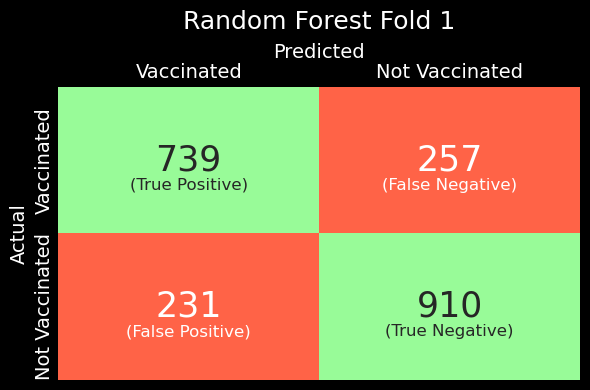



Classification Report:


              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1141
           1       0.76      0.74      0.75       996

    accuracy                           0.77      2137
   macro avg       0.77      0.77      0.77      2137
weighted avg       0.77      0.77      0.77      2137



Sensitivity: 0.742
Specificity: 0.7975
Log Loss: 8.23083895830097




<Figure size 700x700 with 0 Axes>

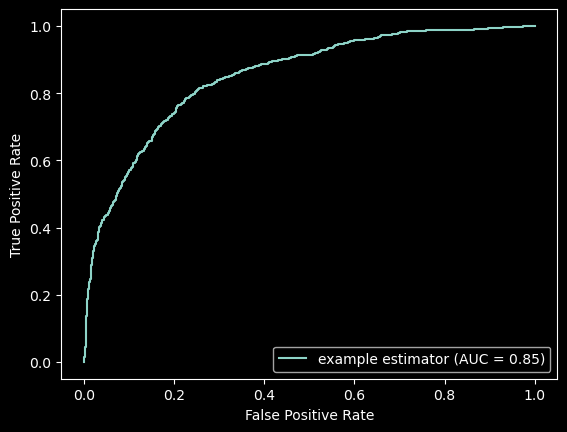

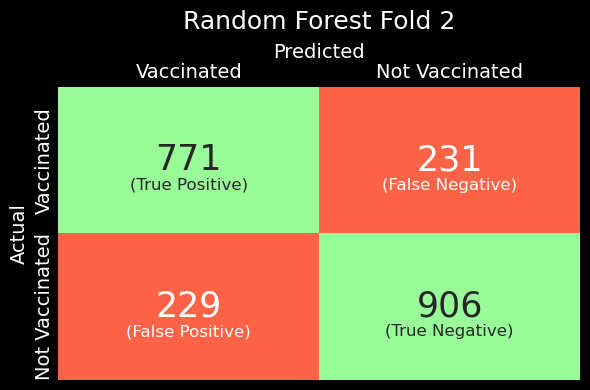



Classification Report:


              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1135
           1       0.77      0.77      0.77      1002

    accuracy                           0.78      2137
   macro avg       0.78      0.78      0.78      2137
weighted avg       0.78      0.78      0.78      2137



Sensitivity: 0.7695
Specificity: 0.7982
Log Loss: 7.758577706595175




<Figure size 700x700 with 0 Axes>

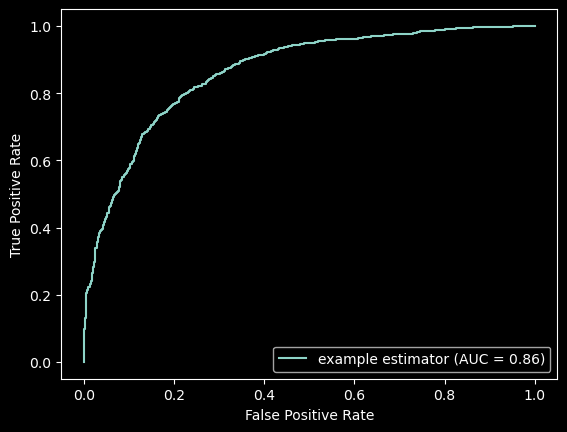

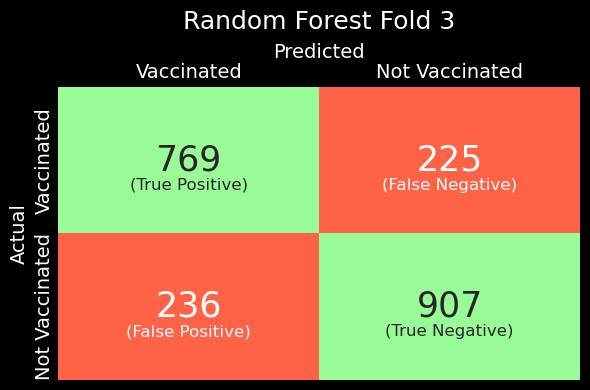



Classification Report:


              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1143
           1       0.77      0.77      0.77       994

    accuracy                           0.78      2137
   macro avg       0.78      0.78      0.78      2137
weighted avg       0.78      0.78      0.78      2137



Sensitivity: 0.7736
Specificity: 0.7935
Log Loss: 7.775444179870381




<Figure size 700x700 with 0 Axes>

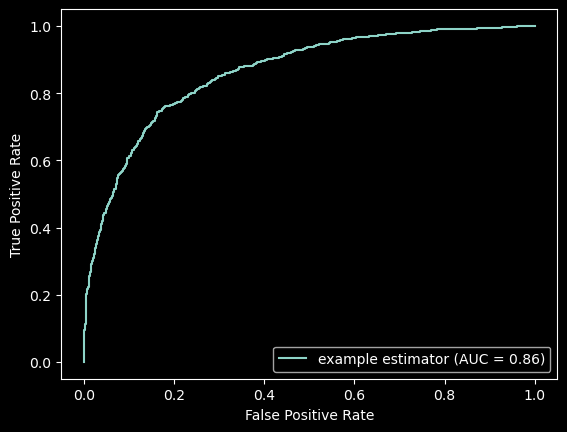

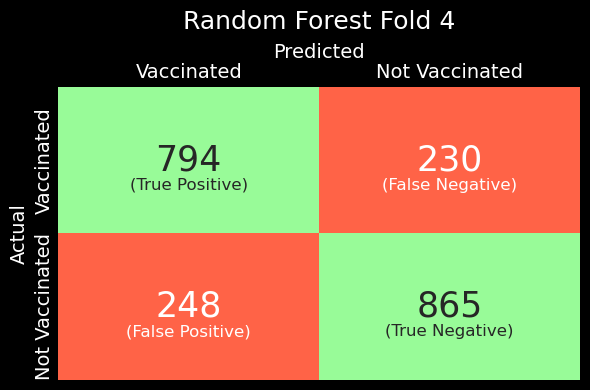



Classification Report:


              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1113
           1       0.76      0.78      0.77      1024

    accuracy                           0.78      2137
   macro avg       0.78      0.78      0.78      2137
weighted avg       0.78      0.78      0.78      2137



Sensitivity: 0.7754
Specificity: 0.7772
Log Loss: 8.062174225548901




<Figure size 700x700 with 0 Axes>

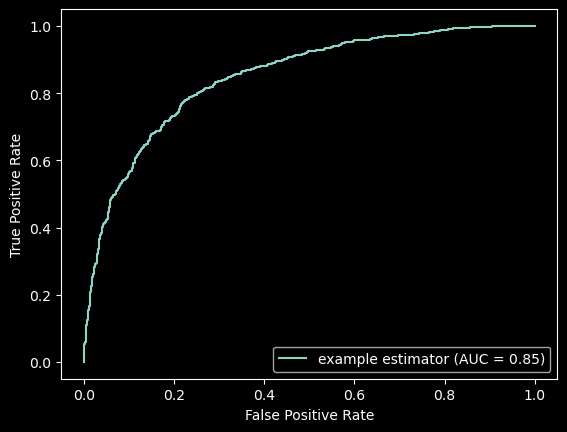

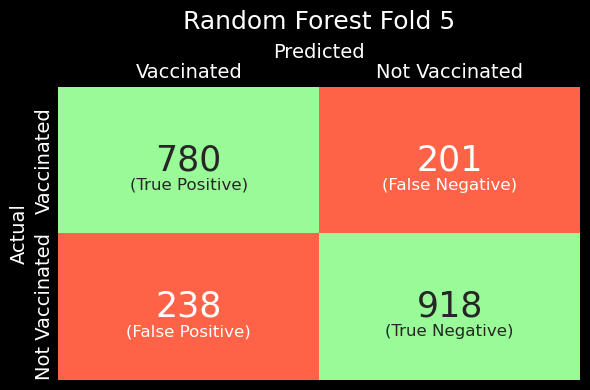



Classification Report:


              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1156
           1       0.77      0.80      0.78       981

    accuracy                           0.79      2137
   macro avg       0.79      0.79      0.79      2137
weighted avg       0.80      0.79      0.79      2137



Sensitivity: 0.7951
Specificity: 0.7941
Log Loss: 7.404381767815831




<Figure size 700x700 with 0 Axes>

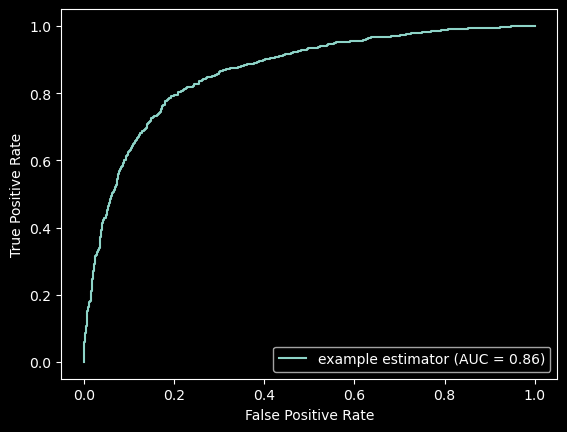

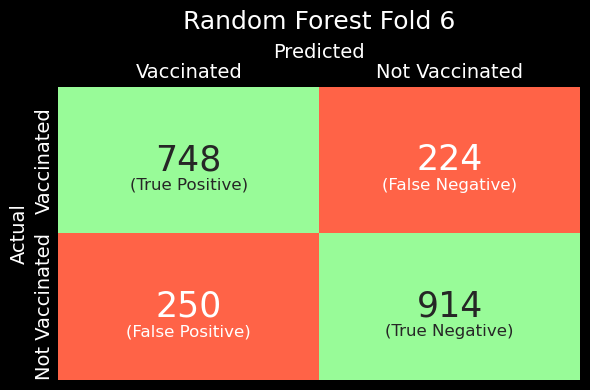



Classification Report:


              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1164
           1       0.75      0.77      0.76       972

    accuracy                           0.78      2136
   macro avg       0.78      0.78      0.78      2136
weighted avg       0.78      0.78      0.78      2136



Sensitivity: 0.7695
Specificity: 0.7852
Log Loss: 7.998451173427683




<Figure size 700x700 with 0 Axes>

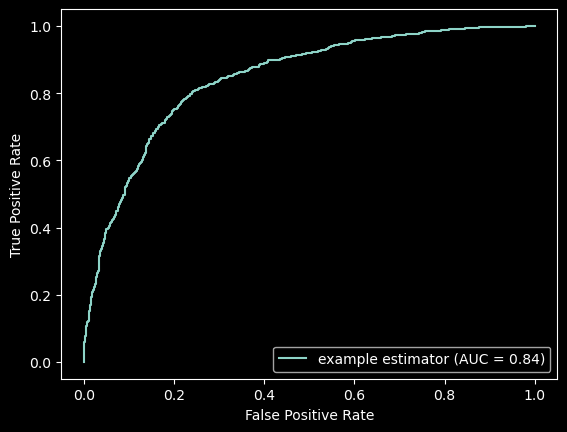

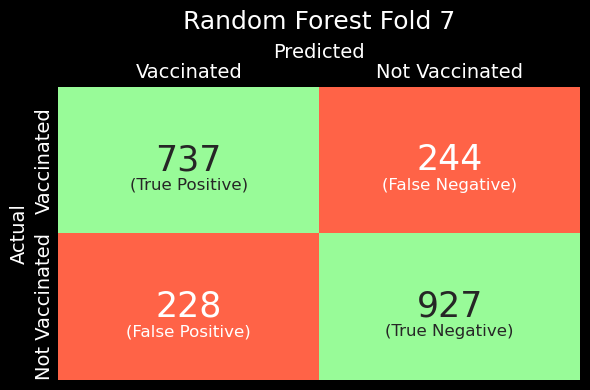



Classification Report:


              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1155
           1       0.76      0.75      0.76       981

    accuracy                           0.78      2136
   macro avg       0.78      0.78      0.78      2136
weighted avg       0.78      0.78      0.78      2136



Sensitivity: 0.7513
Specificity: 0.8026
Log Loss: 7.964702434299295




<Figure size 700x700 with 0 Axes>

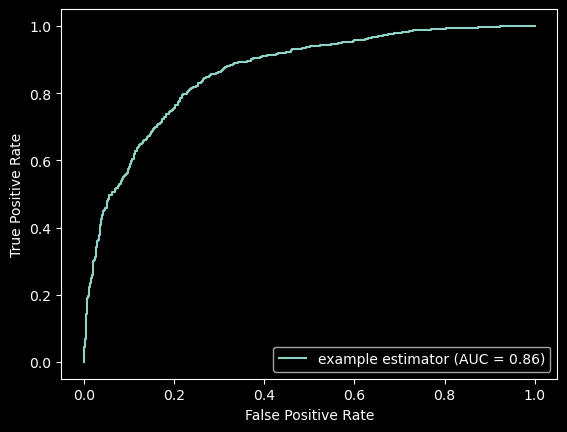

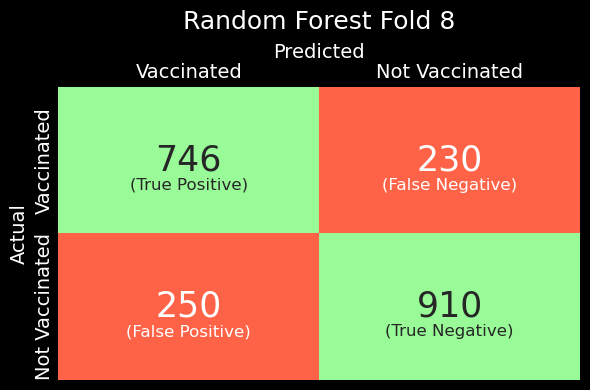



Classification Report:


              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1160
           1       0.75      0.76      0.76       976

    accuracy                           0.78      2136
   macro avg       0.77      0.77      0.77      2136
weighted avg       0.78      0.78      0.78      2136



Sensitivity: 0.7643
Specificity: 0.7845
Log Loss: 8.099697390812844




<Figure size 700x700 with 0 Axes>

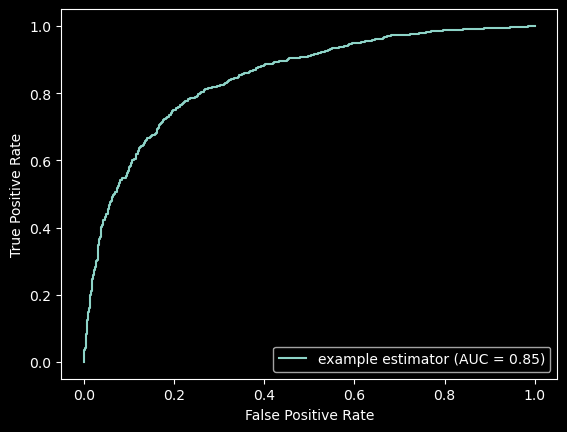

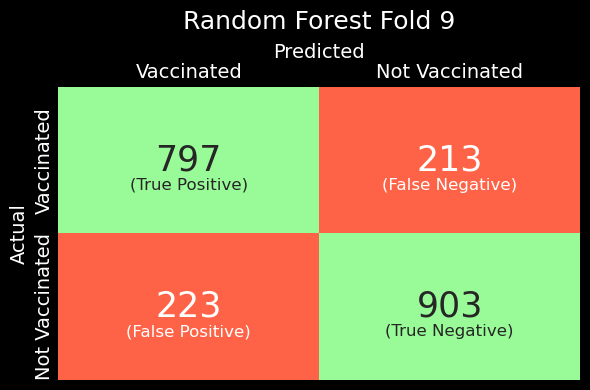



Classification Report:


              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1126
           1       0.78      0.79      0.79      1010

    accuracy                           0.80      2136
   macro avg       0.80      0.80      0.80      2136
weighted avg       0.80      0.80      0.80      2136



Sensitivity: 0.7891
Specificity: 0.802
Log Loss: 7.357225129988333




<Figure size 700x700 with 0 Axes>

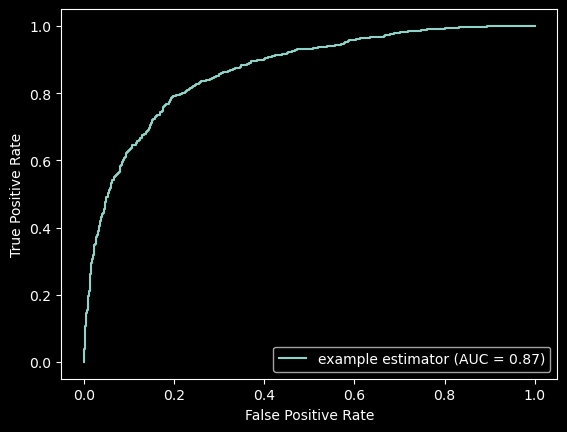

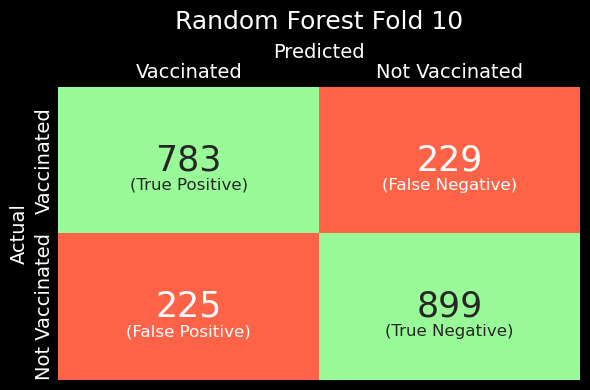



Classification Report:


              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1124
           1       0.78      0.77      0.78      1012

    accuracy                           0.79      2136
   macro avg       0.79      0.79      0.79      2136
weighted avg       0.79      0.79      0.79      2136



Sensitivity: 0.7737
Specificity: 0.7998
Log Loss: 7.660963782143814




<Figure size 700x700 with 0 Axes>

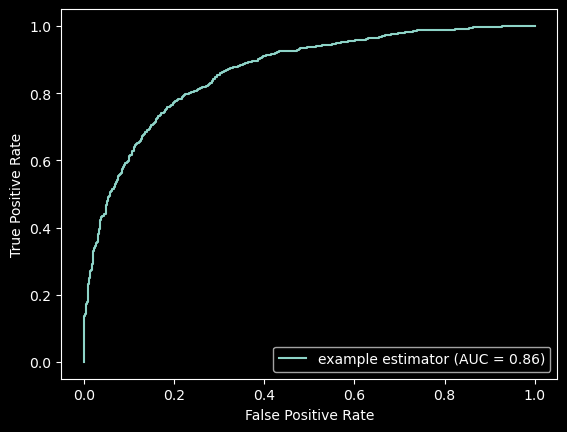

In [33]:

# Assuming you have your data 'X' (input features) and 'y' (target labels)

# Define the number of folds (K)
k = 10

# Initialize lists to store the evaluation metrics
confusion_matrices = []
accuracy_scores = []
truepositive = []
truenegative = []
falsepositive = []
falsenegative = []
specificity = []
sensitivity = []
LogLoss = []
auc = []
test = []
pred_proba = []

# Create the K-fold cross-validation object
kf = KFold(n_splits=k)


X1 = X_seasonal_train.values
y1 = y_seasonal_train.values

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X1):
    # Split the data into training and test sets
    X_train_lr, X_test_lr = X1[train_index], X1[test_index]
    y_train_lr, y_test_lr = y1[train_index], y1[test_index]

    # Train your model on the training set
    clf_seasonal.fit(X_train_lr, y_train_lr)

    # Make predictions on the test set
    y_pred = clf_seasonal.predict(X_test_lr)
    y_pred_proba = clf_seasonal.predict_proba(X_test_lr)


    # Compute the confusion matrix
    cm = confusion_matrix(y_test_lr, y_pred)
    confusion_matrices.append(np.flip(cm))

    tn, fp, fn, tp = cm.ravel()
    truenegative.append(tn)
    falsepositive.append(fp)
    falsenegative.append(fn)
    truepositive.append(tp)


    #Compute Specificity and Sensitivity
    Sensitivity = np.round(tp / (tp+fn),4)
    sensitivity.append(Sensitivity)
    Specificity = np.round(tn / (tn+fp),4)
    specificity.append(Specificity)


    #Compute the log loss
    logloss = log_loss(y_test_lr, y_pred, labels=[0, 1])
    LogLoss.append(logloss)

    # Compute the classification report
    accuracy = classification_report(y_test_lr, y_pred)
    accuracy_scores.append(accuracy)

    AUC = roc_auc_score(y_test_lr, y_pred_proba[:,1], average='macro')
    print(AUC)
    auc.append(AUC)

    pred_proba.append(y_pred_proba[:,1])
    test.append(y_test_lr)

# Print the confusion matrices and accuracy scores for each fold
for fold in range(k):
    confusion_matrix_plotting(confusion_matrices[fold], ("Random Forest " + f"Fold {fold+1}"))
    print("\n")
    print("Classification Report:")
    print("\n")
    print(accuracy_scores[fold])
    print("\n")
    print("Sensitivity: " + str(sensitivity[fold]))
    print("Specificity: " + str(specificity[fold]))
    print("Log Loss: " + str(LogLoss[fold]))
    print("\n")
    plot_roc_curve(test[fold],pred_proba[fold])
    print()

In [34]:
# Python program to get average of a list
def Average(lst):
    return sum(lst) / len(lst)

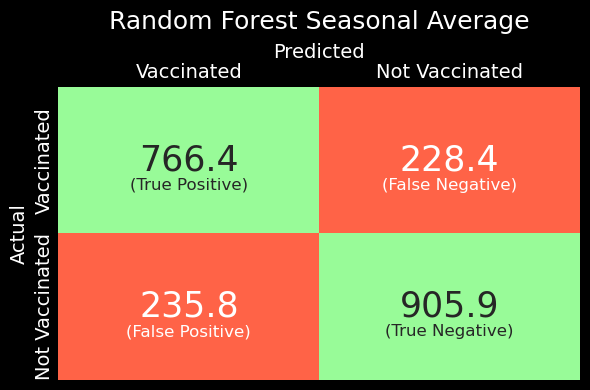

In [35]:
test = np.array([[Average(truepositive), Average(falsenegative)], [Average(falsepositive), Average(truenegative)]]) 
confusion_matrix_plotting(test, ("Random Forest Seasonal Average"))

In [36]:
print(Average(auc))

0.8574064676001246


In [37]:
clf_h1n1 = RandomForestClassifier(**study_h1n1.best_params, n_jobs=-1, random_state=42, verbose=0)

0.8686141290167716
0.8675996686583519
0.8561598977361496
0.855475763016158
0.8802563667010753
0.8730891905044009
0.8756714091733055
0.876662673616732
0.8654226136674164
0.8496731250823778


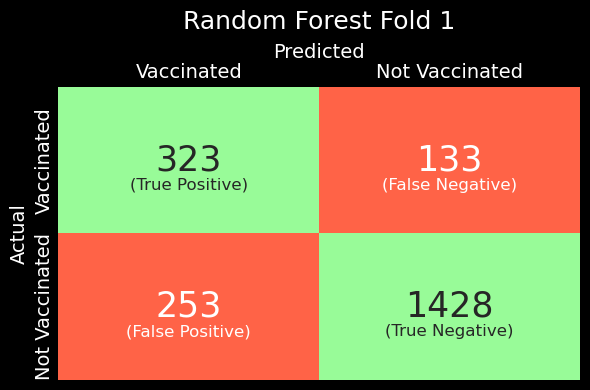



Classification Report:


              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1681
           1       0.56      0.71      0.63       456

    accuracy                           0.82      2137
   macro avg       0.74      0.78      0.75      2137
weighted avg       0.84      0.82      0.83      2137



Sensitivity: 0.7083
Specificity: 0.8495
Log Loss: 6.510458684229865




<Figure size 700x700 with 0 Axes>

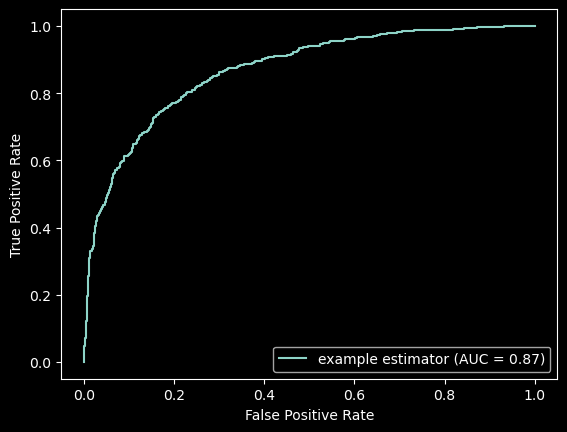

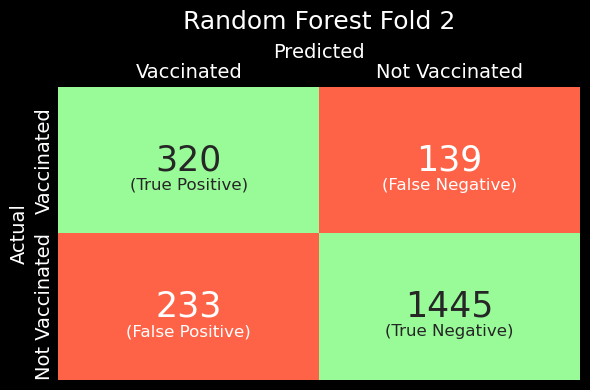



Classification Report:


              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1678
           1       0.58      0.70      0.63       459

    accuracy                           0.83      2137
   macro avg       0.75      0.78      0.76      2137
weighted avg       0.84      0.83      0.83      2137



Sensitivity: 0.6972
Specificity: 0.8611
Log Loss: 6.274328058376968




<Figure size 700x700 with 0 Axes>

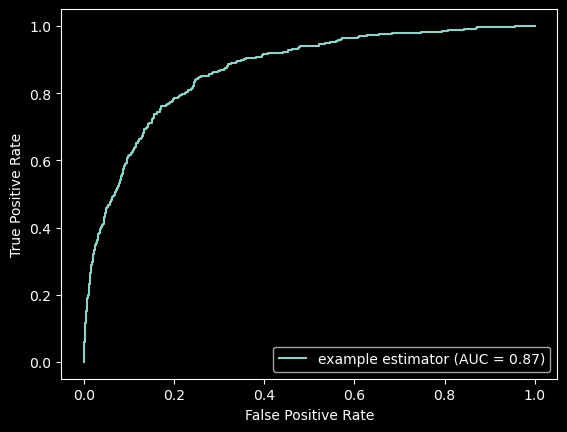

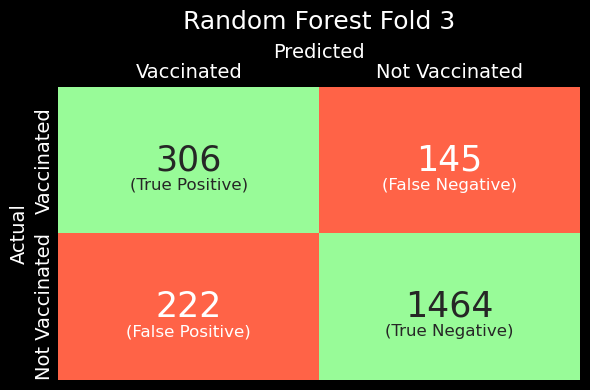



Classification Report:


              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1686
           1       0.58      0.68      0.63       451

    accuracy                           0.83      2137
   macro avg       0.74      0.77      0.76      2137
weighted avg       0.84      0.83      0.83      2137



Sensitivity: 0.6785
Specificity: 0.8683
Log Loss: 6.189995692000934




<Figure size 700x700 with 0 Axes>

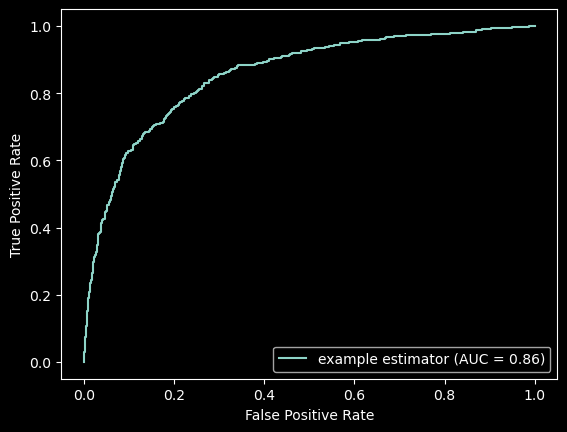

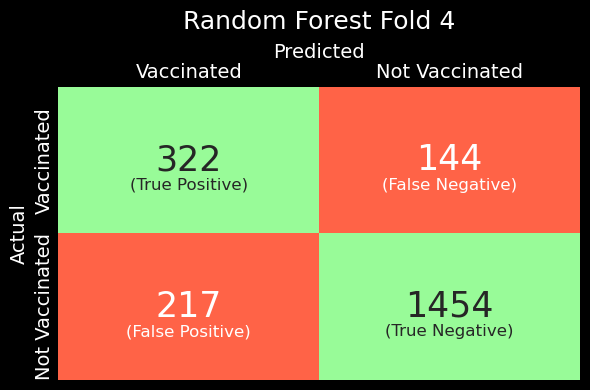



Classification Report:


              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1671
           1       0.60      0.69      0.64       466

    accuracy                           0.83      2137
   macro avg       0.75      0.78      0.77      2137
weighted avg       0.84      0.83      0.84      2137



Sensitivity: 0.691
Specificity: 0.8701
Log Loss: 6.088796852349692




<Figure size 700x700 with 0 Axes>

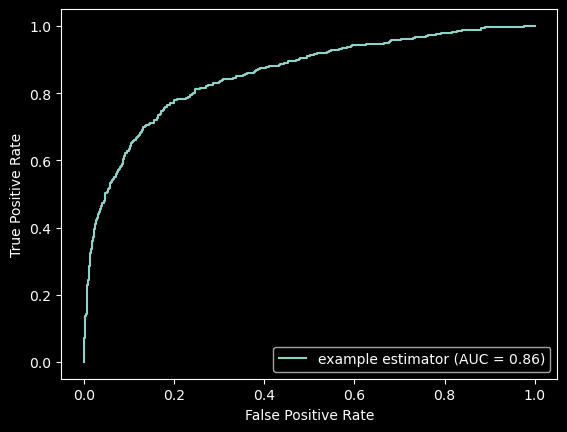

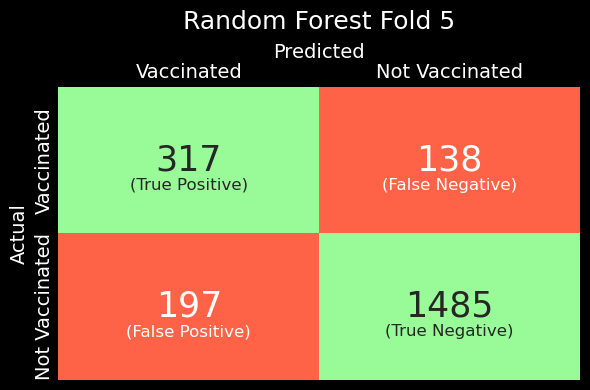



Classification Report:


              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1682
           1       0.62      0.70      0.65       455

    accuracy                           0.84      2137
   macro avg       0.77      0.79      0.78      2137
weighted avg       0.85      0.84      0.85      2137



Sensitivity: 0.6967
Specificity: 0.8829
Log Loss: 5.6502685471943135




<Figure size 700x700 with 0 Axes>

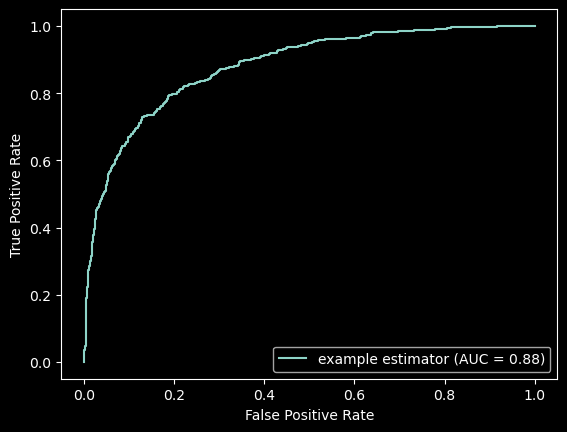

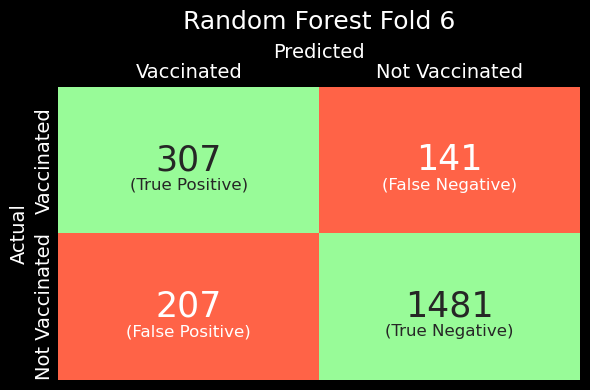



Classification Report:


              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1688
           1       0.60      0.69      0.64       448

    accuracy                           0.84      2136
   macro avg       0.76      0.78      0.77      2136
weighted avg       0.85      0.84      0.84      2136



Sensitivity: 0.6853
Specificity: 0.8774
Log Loss: 5.872280608339311




<Figure size 700x700 with 0 Axes>

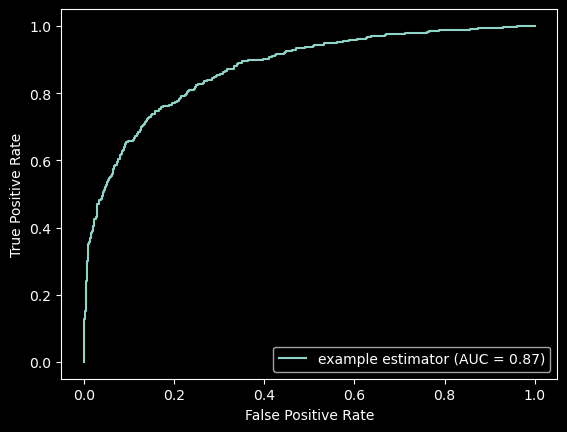

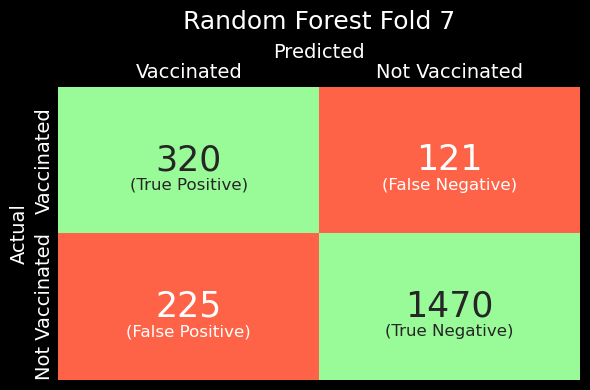



Classification Report:


              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1695
           1       0.59      0.73      0.65       441

    accuracy                           0.84      2136
   macro avg       0.76      0.80      0.77      2136
weighted avg       0.85      0.84      0.84      2136



Sensitivity: 0.7256
Specificity: 0.8673
Log Loss: 5.838531869210924




<Figure size 700x700 with 0 Axes>

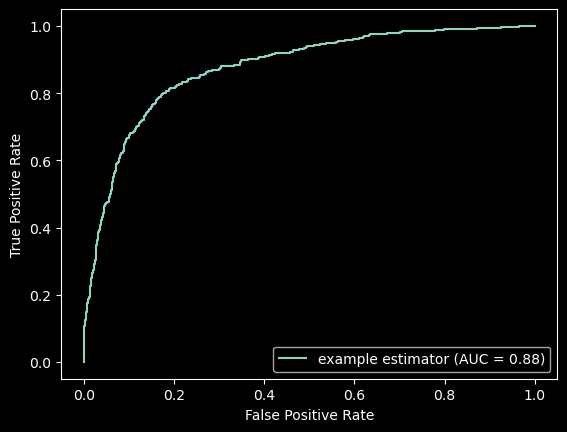

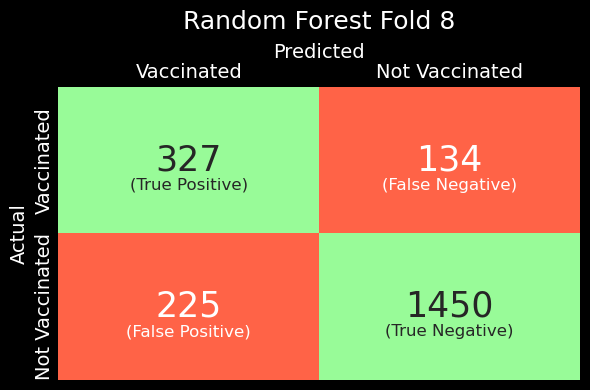



Classification Report:


              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1675
           1       0.59      0.71      0.65       461

    accuracy                           0.83      2136
   macro avg       0.75      0.79      0.77      2136
weighted avg       0.85      0.83      0.84      2136



Sensitivity: 0.7093
Specificity: 0.8657
Log Loss: 6.057898673545439




<Figure size 700x700 with 0 Axes>

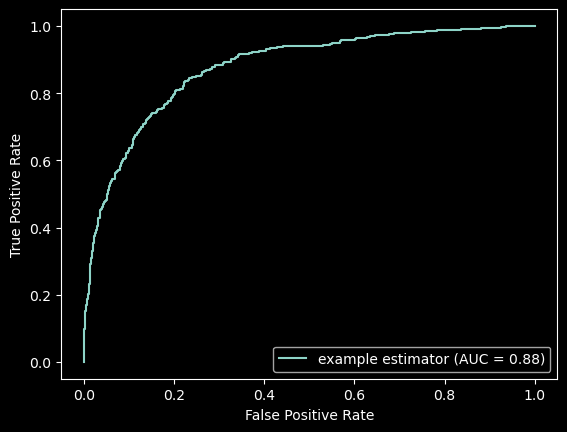

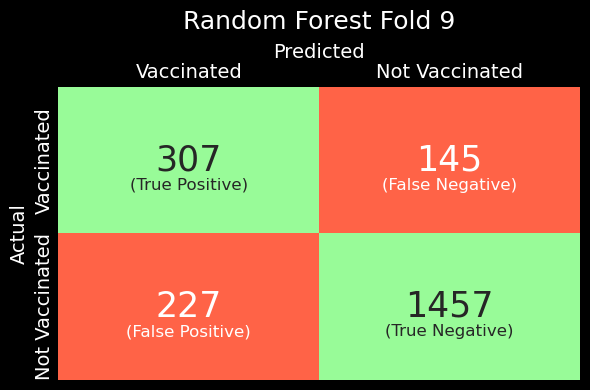



Classification Report:


              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1684
           1       0.57      0.68      0.62       452

    accuracy                           0.83      2136
   macro avg       0.74      0.77      0.75      2136
weighted avg       0.84      0.83      0.83      2136



Sensitivity: 0.6792
Specificity: 0.8652
Log Loss: 6.277265477879953




<Figure size 700x700 with 0 Axes>

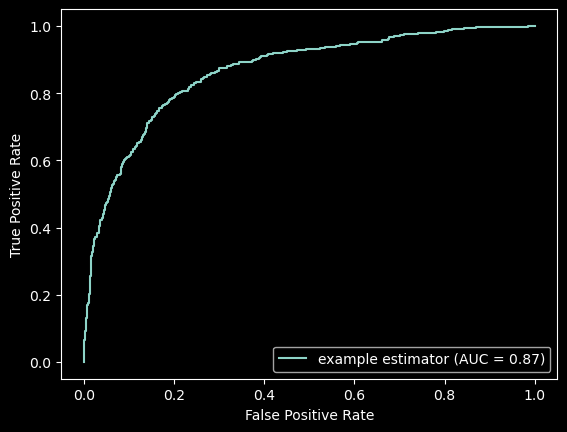

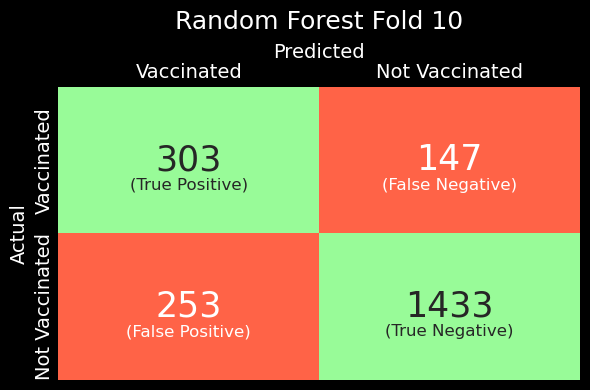



Classification Report:


              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1686
           1       0.54      0.67      0.60       450

    accuracy                           0.81      2136
   macro avg       0.73      0.76      0.74      2136
weighted avg       0.83      0.81      0.82      2136



Sensitivity: 0.6733
Specificity: 0.8499
Log Loss: 6.749747825677369




<Figure size 700x700 with 0 Axes>

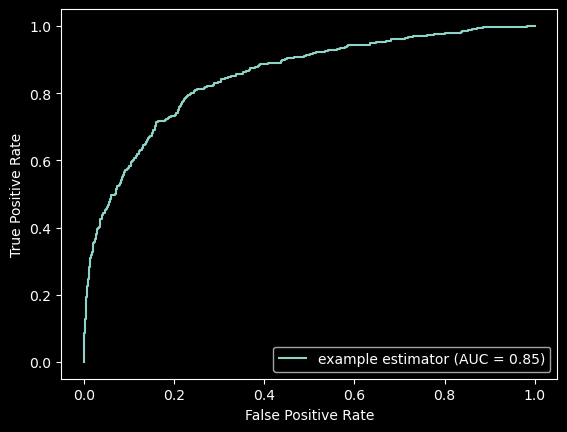

In [38]:

# Assuming you have your data 'X' (input features) and 'y' (target labels)

# Define the number of folds (K)
k = 10

# Initialize lists to store the evaluation metrics
confusion_matrices = []
accuracy_scores = []
truepositive = []
truenegative = []
falsepositive = []
falsenegative = []
specificity = []
sensitivity = []
LogLoss = []
auc = []
test = []
pred_proba = []

# Create the K-fold cross-validation object
kf = KFold(n_splits=k)


X1 = X_h1n1_train.values
y1 = y_h1n1_train.values

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X1):
    # Split the data into training and test sets
    X_train_lr, X_test_lr = X1[train_index], X1[test_index]
    y_train_lr, y_test_lr = y1[train_index], y1[test_index]

    # Train your model on the training set
    clf_h1n1.fit(X_train_lr, y_train_lr)

    # Make predictions on the test set
    y_pred = clf_h1n1.predict(X_test_lr)
    y_pred_proba = clf_h1n1.predict_proba(X_test_lr)


    # Compute the confusion matrix
    cm = confusion_matrix(y_test_lr, y_pred)
    confusion_matrices.append(np.flip(cm))

    tn, fp, fn, tp = cm.ravel()
    truenegative.append(tn)
    falsepositive.append(fp)
    falsenegative.append(fn)
    truepositive.append(tp)


    #Compute Specificity and Sensitivity
    Sensitivity = np.round(tp / (tp+fn),4)
    sensitivity.append(Sensitivity)
    Specificity = np.round(tn / (tn+fp),4)
    specificity.append(Specificity)


    #Compute the log loss
    logloss = log_loss(y_test_lr, y_pred, labels=[0, 1])
    LogLoss.append(logloss)

    # Compute the classification report
    accuracy = classification_report(y_test_lr, y_pred)
    accuracy_scores.append(accuracy)

    AUC = roc_auc_score(y_test_lr, y_pred_proba[:,1], average='macro')
    print(AUC)
    auc.append(AUC)

    pred_proba.append(y_pred_proba[:,1])
    test.append(y_test_lr)

# Print the confusion matrices and accuracy scores for each fold
for fold in range(k):
    confusion_matrix_plotting(confusion_matrices[fold], ("Random Forest " + f"Fold {fold+1}"))
    print("\n")
    print("Classification Report:")
    print("\n")
    print(accuracy_scores[fold])
    print("\n")
    print("Sensitivity: " + str(sensitivity[fold]))
    print("Specificity: " + str(specificity[fold]))
    print("Log Loss: " + str(LogLoss[fold]))
    print("\n")
    plot_roc_curve(test[fold],pred_proba[fold])
    print()

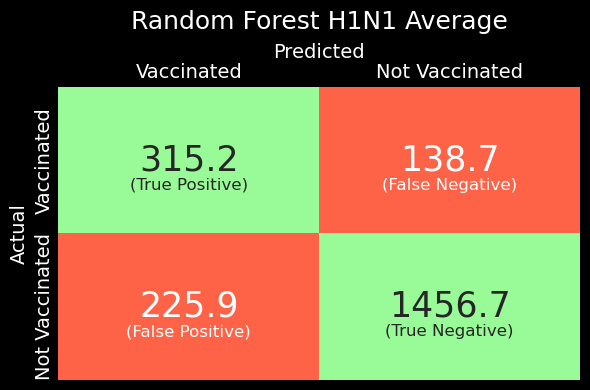

In [39]:
test_h1n1 = np.array([[Average(truepositive), Average(falsenegative)], [Average(falsepositive), Average(truenegative)]]) 
confusion_matrix_plotting(test_h1n1, ("Random Forest H1N1 Average"))

In [40]:
print(Average(auc))

0.8668624837172739


In [41]:
a = X_seasonal_test

# transform the train by using the data cleaning stuff above to fill in missing data and create dummy variables
processed_data = preprocessor_seasonal.transform(a)

# Get the feature names for the transformed data
categorical_feature_names = preprocessor_seasonal.named_transformers_['cat']\
                    .named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numeric feature names with categorical feature names
all_feature_names = numeric_features + list(categorical_feature_names) + ordinal_features

# Convert the processed data array back into a DataFrame
X_seasonal_test = pd.DataFrame(processed_data, columns=all_feature_names)

X_seasonal_test["seasonal_vaccine_effectiveness"] = X_seasonal_test["opinion_seas_vacc_effective"]*X_seasonal_test["opinion_seas_sick_from_vacc"]
X_seasonal_test["seasonal_household"]=X_seasonal_test["household_children"]*X_seasonal_test["household_adults"]

X_seasonal_test = X_seasonal_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

X_seasonal_test = X_seasonal_test.loc[:,~X_seasonal_test.columns.duplicated()].copy()

In [42]:
clf_seasonal.fit(X_seasonal_train, y_seasonal_train)

RandomForestClassifier(class_weight='balanced', max_depth=14, max_features=0.19,
                       max_samples=0.9500000000000001, min_samples_split=10,
                       n_estimators=800, n_jobs=-1, random_state=42)

In [43]:
importances = (clf_seasonal.feature_importances_)/sum(clf_seasonal.feature_importances_)
importances

array([1.46683219e-02, 1.53841045e-02, 3.77585819e-03, 5.14698465e-03,
       4.95714993e-03, 7.40610163e-03, 2.05999440e-02, 1.19542959e-02,
       4.41358270e-03, 1.22563088e-02, 1.94047121e-02, 2.22415516e-02,
       2.79988845e-02, 1.37962098e-02, 1.22210738e-01, 1.28229790e-01,
       1.43130362e-01, 2.18792494e-02, 1.13149001e-02, 1.19937591e-02,
       4.98518939e-03, 3.41541691e-03, 5.25000484e-03, 3.78127670e-03,
       4.35829992e-03, 2.74956998e-03, 4.58482154e-03, 4.23388711e-03,
       3.95064298e-03, 4.49320133e-03, 3.72825189e-03, 4.36029814e-03,
       4.03953530e-03, 4.76192919e-03, 4.62134743e-03, 4.71014694e-03,
       2.85222760e-03, 1.89954924e-03, 1.25758616e-03, 8.78874213e-04,
       7.24143927e-03, 3.80711263e-03, 2.31665966e-03, 9.46237254e-04,
       2.62505511e-03, 8.40584562e-04, 1.07935092e-03, 4.79264297e-04,
       2.11837848e-03, 8.67097198e-05, 1.68327466e-03, 1.41472541e-03,
       1.87639465e-03, 9.77943026e-04, 2.80369960e-03, 1.83613267e-03,
      

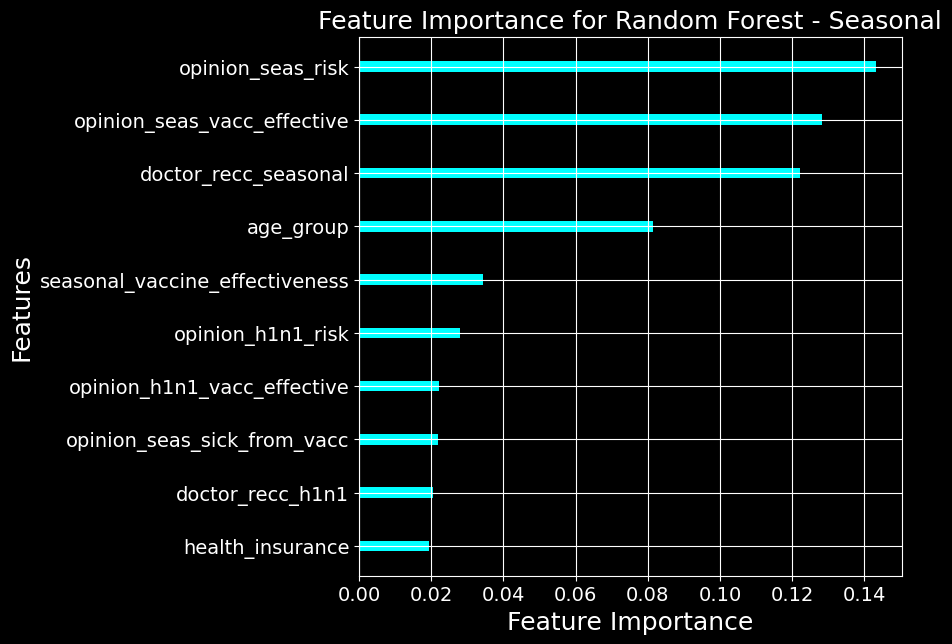

In [44]:
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(7,7))
plt.style.use('dark_background')
plt.barh(range(len(indices)), importances[indices], color="cyan", height=0.2, align='center')
plt.yticks(range(len(indices)), [X_seasonal_train.columns.values.tolist()[i] for i in indices], fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Feature Importance", fontsize=18)
plt.ylabel("Features", fontsize=18)
plt.title("Feature Importance for Random Forest - Seasonal", fontsize=18)
plt.grid()
plt.show()

In [45]:
y_seasonal_pred = clf_seasonal.predict(X_seasonal_test)

In [46]:
print(X_seasonal_test)

false_predictions = np.where(y_seasonal_pred != y_seasonal_test)[0]

# Print the indices of false predictions and their corresponding true and predicted labels
for idx in false_predictions:
    print(f"Index: {idx}, True label: {y_seasonal_test.to_list()[idx]}, Predicted label: {y_seasonal_pred[idx]}")

      h1n1_concern  h1n1_knowledge  behavioral_face_mask  \
0              3.0             1.0                   0.0   
1              1.0             1.0                   0.0   
2              1.0             2.0                   0.0   
3              3.0             1.0                   0.0   
4              1.0             2.0                   0.0   
...            ...             ...                   ...   
5337           3.0             2.0                   1.0   
5338           1.0             2.0                   1.0   
5339           2.0             1.0                   0.0   
5340           0.0             1.0                   0.0   
5341           2.0             1.0                   0.0   

      behavioral_wash_hands  behavioral_large_gatherings  \
0                       1.0                     1.000000   
1                       1.0                     1.000000   
2                       1.0                     0.000000   
3                       1.0            

In [47]:
y_seasonal_test_new = y_seasonal_test.to_list()
data_seasonal = pd.concat([X_seasonal_test, pd.DataFrame(data={'Prediction': y_seasonal_pred, 'Actual': y_seasonal_test_new})], axis=1)
data_seasonal

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_Rent,rent_or_own_nan,age_group,education,income_poverty,employment_status,seasonal_vaccine_effectiveness,seasonal_household,Prediction,Actual
0,3.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,3.0,0.0,0.0,10.0,0.0,1,1
1,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,10.0,9.0,1,0
2,1.0,2.0,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,2.0,1.0,1.0,10.0,0.0,1,0
3,3.0,1.0,0.0,1.0,1.000000,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,3.0,2.0,0.0,20.0,0.0,0,0
4,1.0,2.0,0.0,1.0,0.000000,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,4.0,2.0,0.0,0.0,3.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5337,3.0,2.0,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,3.0,2.0,1.0,0.0,5.0,0.0,1,1
5338,1.0,2.0,1.0,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,4.0,2.0,0.0,1.0,8.0,0.0,0,1
5339,2.0,1.0,0.0,1.0,0.360477,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,4.0,3.0,3.0,1.0,4.0,0.0,1,1
5340,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,0.0,0.0,2.0,2.0,0,0


In [48]:
data_seasonal.iloc[:,[-2,-1]].to_csv("seasonalrf.csv", sep=",")

In [49]:
# False Negative
data_seasonal.query('Prediction==0 & Actual==1 ')

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_Rent,rent_or_own_nan,age_group,education,income_poverty,employment_status,seasonal_vaccine_effectiveness,seasonal_household,Prediction,Actual
24,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.00000,0.000000,...,0.0,0.0,4.0,1.0,0.0,1.0,16.000000,0.00000,0,1
30,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,3.0,3.0,0.0,0.0,8.000000,2.00000,0,1
40,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.00000,0.000000,...,0.0,0.0,2.0,3.0,1.0,0.0,5.000000,3.00000,0,1
54,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000,0.00000,0.000000,...,0.0,0.0,4.0,1.0,2.0,1.0,15.000000,0.00000,0,1
62,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,2.0,2.0,0.0,2.0,6.000000,2.00000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5299,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.281897,0.08178,0.111369,...,0.0,1.0,0.0,4.0,3.0,3.0,8.540617,0.47173,0,1
5305,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,3.0,3.0,2.0,1.0,20.000000,0.00000,0,1
5317,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,3.0,2.0,1.0,0.0,10.000000,1.00000,0,1
5320,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.000000,1.00000,0.000000,...,0.0,0.0,1.0,2.0,0.0,0.0,16.000000,1.00000,0,1


In [50]:
# False Positive
data_seasonal.query('Prediction==1 & Actual==0 ')

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_Rent,rent_or_own_nan,age_group,education,income_poverty,employment_status,seasonal_vaccine_effectiveness,seasonal_household,Prediction,Actual
1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,10.0,9.0,1,0
2,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,2.0,1.0,1.0,10.0,0.0,1,0
13,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,3.0,0.0,0.0,8.0,1.0,1,0
25,3.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,1.0,20.0,3.0,1,0
38,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,2.0,1.0,1.0,4.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5283,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,3.0,0.0,8.0,1.0,1,0
5307,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,5.0,3.0,1,0
5311,3.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,2.0,1.0,1.0,10.0,0.0,1,0
5318,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,8.0,0.0,1,0


In [51]:
# True Positive
data_seasonal.query('Prediction==1 & Actual==1 ')

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_Rent,rent_or_own_nan,age_group,education,income_poverty,employment_status,seasonal_vaccine_effectiveness,seasonal_household,Prediction,Actual
0,3.0,1.0,0.0,1.0,1.000000,1.000000,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,3.0,0.0,0.0,10.0,0.0,1,1
6,2.0,2.0,0.0,1.0,1.000000,1.000000,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,3.0,0.0,0.0,10.0,1.0,1,1
7,2.0,2.0,0.0,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,1.0,0.0,1.0,5.0,0.0,1,1
9,1.0,2.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,2.0,0.0,0.0,5.0,0.0,1,1
11,2.0,2.0,1.0,1.0,0.000000,0.674928,0.0,0.0,1.0,0.0,...,0.0,0.0,4.0,2.0,3.0,1.0,5.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5333,2.0,2.0,0.0,1.0,0.000000,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,3.0,2.0,3.0,5.0,0.0,1,1
5335,2.0,1.0,0.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,1.0,4.0,0.0,1,1
5337,3.0,2.0,1.0,1.0,1.000000,1.000000,1.0,0.0,1.0,1.0,...,0.0,0.0,3.0,2.0,1.0,0.0,5.0,0.0,1,1
5339,2.0,1.0,0.0,1.0,0.360477,1.000000,1.0,1.0,0.0,0.0,...,0.0,0.0,4.0,3.0,3.0,1.0,4.0,0.0,1,1


In [52]:
# True Negative
data_seasonal.query('Prediction==0 & Actual==0 ')

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_Rent,rent_or_own_nan,age_group,education,income_poverty,employment_status,seasonal_vaccine_effectiveness,seasonal_household,Prediction,Actual
3,3.0,1.0,0.0,1.0,1.0,1.0,0.000000,1.000000,0.00000,1.000000,...,1.0,0.0,3.0,3.0,2.0,0.0,20.000000,0.0,0,0
4,1.0,2.0,0.0,1.0,0.0,1.0,0.000000,1.000000,0.00000,0.000000,...,1.0,0.0,4.0,2.0,0.0,0.0,3.000000,0.0,0,0
5,3.0,1.0,0.0,1.0,1.0,1.0,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,3.0,1.0,0.0,2.0,20.000000,1.0,0,0
8,3.0,1.0,0.0,1.0,1.0,1.0,0.219107,0.000000,0.00000,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,20.000000,2.0,0,0
10,0.0,2.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.00000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,16.000000,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,3.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,3.0,2.0,8.000000,0.0,0,0
5331,3.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.281897,0.08178,0.111369,...,0.0,1.0,1.0,4.0,3.0,3.0,20.000000,0.0,0,0
5334,2.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,...,1.0,0.0,2.0,0.0,0.0,2.0,4.025961,0.0,0,0
5336,2.0,1.0,0.0,1.0,1.0,1.0,1.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,3.0,0.0,1.0,16.000000,0.0,0,0


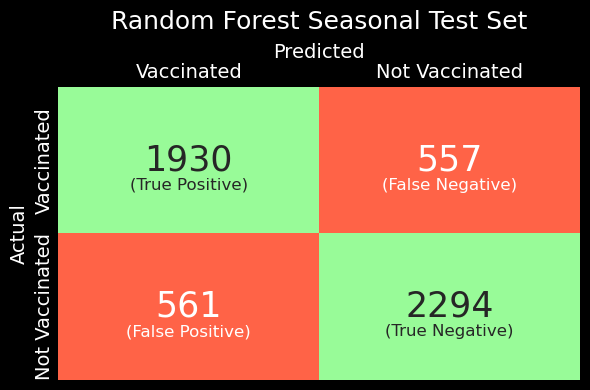

In [53]:
cm = confusion_matrix(y_seasonal_test, y_seasonal_pred)
confusion_matrix_plotting(np.flip(cm), "Random Forest Seasonal Test Set")

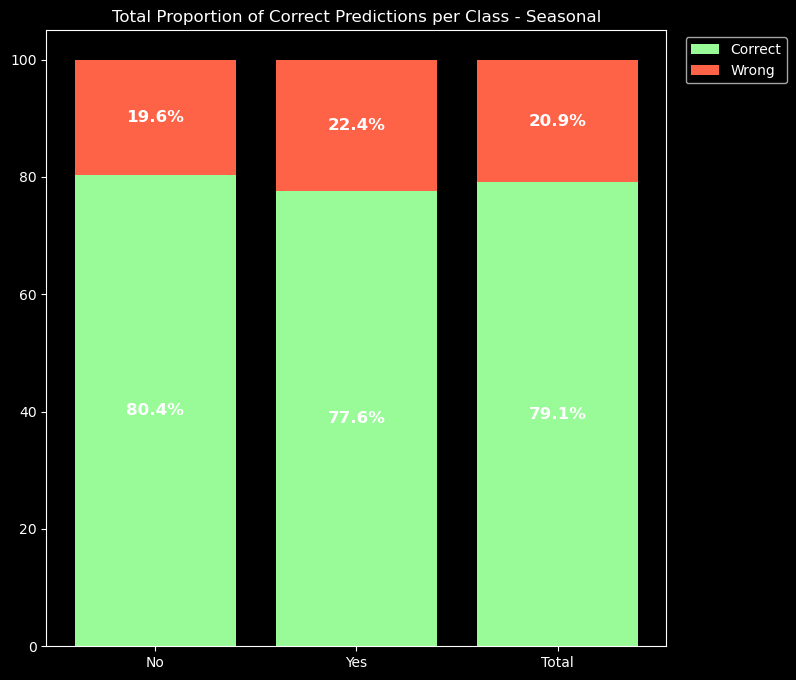

In [54]:
tn = cm[0][0]
fp = cm[0][1]

fn = cm[1][0]
tp = cm[1][1]

negative = tn + fp
positive = tp + fn

total = tn + fp + tp + fn

no_weights = []
no_weights.append((fp/negative)*100)
no_weights.append((fn/positive)*100)
no_weights.append(((fn+fp)/total)*100)

yes_weights = []
yes_weights.append((tn/negative)*100)
yes_weights.append((tp/positive)*100)
yes_weights.append(((tn+tp)/total)*100)


species = (
    "No",
    "Yes",
    "Total",
)
weight_counts = {
    "Correct": yes_weights,
    "Wrong": no_weights,

}

fig, ax = plt.subplots(1,1,figsize=(8,8))
bottom = np.zeros(3)

j = 0

colors = ['palegreen', 'tomato']

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, label=boolean, bottom=bottom, color=colors[j])
    
    for i, rect in enumerate(p):
        height = rect.get_height()
        if height >= 0:
            ax.text(rect.get_x() + rect.get_width() / 2, 
                    bottom[i] + height / 2, 
                    "{:.1f}%".format(height),
                    ha='center', 
                    va='center',
                   fontsize=12,
                   weight="bold")
    
    bottom += weight_count
    j += 1

ax.set_title("Total Proportion of Correct Predictions per Class - Seasonal")
ax.legend(bbox_to_anchor=(1.02, 1))
ax.set_yticks(ticks=[0, 20, 40, 60, 80, 100])
plt.show()

In [55]:
sensitivity = np.round(tp / (tp+fn),4)
print("Sensitivity: " + str(sensitivity))

Sensitivity: 0.776


In [56]:
specificity = np.round(tn / (tn+fp),4)
print("Specificity: " + str(specificity))

Specificity: 0.8035


In [57]:
print(classification_report(y_seasonal_test, y_seasonal_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2855
           1       0.77      0.78      0.78      2487

    accuracy                           0.79      5342
   macro avg       0.79      0.79      0.79      5342
weighted avg       0.79      0.79      0.79      5342



0.8641475074943118


<Figure size 700x700 with 0 Axes>

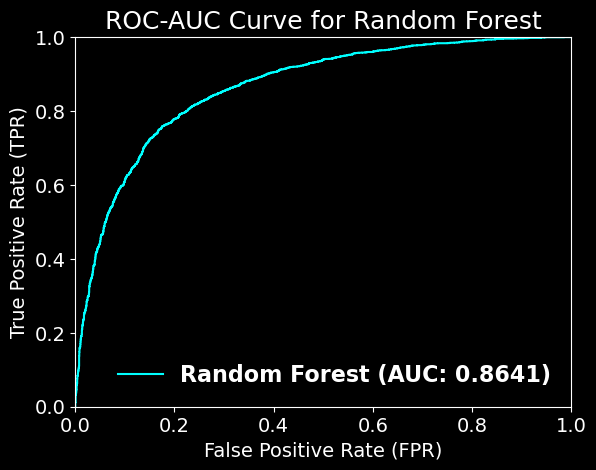

In [58]:
y_seasonal_pred_proba = clf_seasonal.predict_proba(X_seasonal_test)
plt.style.use('dark_background')
plt.figure(figsize=(7,7))
fpr1, tpr1, threshold1 = roc_curve(y_seasonal_test, y_seasonal_pred_proba[:,1])
roc_auc = metrics.auc(fpr1, tpr1)
print(roc_auc)
display = RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=np.round(roc_auc,4))
display.plot(color="cyan")
plt.grid(False)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.title("ROC-AUC Curve for Random Forest", fontsize=18)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14)
legend_properties = {'size': 16, 'weight':'bold'}
plt.legend(loc=4, labels=['Random Forest (AUC: ' + str(np.round(roc_auc,4)) + ")"], prop=legend_properties, frameon=False)
plt.show()

In [59]:
a = X_h1n1_test

# transform the train by using the data cleaning stuff above to fill in missing data and create dummy variables
processed_data = preprocessor_h1n1.transform(a)

# Get the feature names for the transformed data
categorical_feature_names = preprocessor_h1n1.named_transformers_['cat']\
                    .named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numeric feature names with categorical feature names
all_feature_names = numeric_features + list(categorical_feature_names) + ordinal_features

# Convert the processed data array back into a DataFrame
X_h1n1_test = pd.DataFrame(processed_data, columns=all_feature_names)

X_h1n1_test["h1n1_flu"] = X_h1n1_test["h1n1_concern"]*X_h1n1_test["h1n1_knowledge"]
X_h1n1_test["h1n1_vaccine_effectiveness"] = X_h1n1_test["opinion_h1n1_vacc_effective"]*X_h1n1_test["opinion_h1n1_sick_from_vacc"]
X_h1n1_test["h1n1_chronic"] = X_h1n1_test["chronic_med_condition"]*X_h1n1_test["doctor_recc_h1n1"]

X_h1n1_test = X_h1n1_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

X_h1n1_test = X_h1n1_test.loc[:,~X_h1n1_test.columns.duplicated()].copy()

In [60]:
clf_h1n1.fit(X_h1n1_train, y_h1n1_train)

RandomForestClassifier(class_weight='balanced', max_depth=14,
                       max_features=0.15000000000000002, max_samples=0.92,
                       min_samples_split=20, n_estimators=550, n_jobs=-1,
                       random_state=42)

In [61]:
importances = (clf_h1n1.feature_importances_)/sum(clf_h1n1.feature_importances_)
importances

array([1.20100282e-02, 1.10293312e-02, 4.05954594e-03, 4.20243041e-03,
       4.16137918e-03, 4.41896850e-03, 1.62533290e-01, 6.30485334e-03,
       4.34536571e-03, 2.15129249e-02, 1.05020472e-01, 8.20706369e-02,
       1.12150515e-01, 1.09599659e-02, 2.96872619e-02, 2.51123929e-02,
       4.97497349e-02, 1.15098343e-02, 9.32823417e-03, 8.56712082e-03,
       4.45570179e-03, 4.04173327e-03, 4.36576495e-03, 3.09781166e-03,
       3.60423083e-03, 2.56853247e-03, 3.68845331e-03, 3.70260142e-03,
       3.08919745e-03, 4.49921637e-03, 3.69126195e-03, 3.05348019e-03,
       3.32754418e-03, 3.72927452e-03, 3.74536306e-03, 3.68684633e-03,
       2.70707872e-03, 1.75284517e-03, 1.07029018e-03, 4.91511312e-04,
       1.10224138e-02, 4.22331529e-03, 2.13900243e-03, 9.35787865e-04,
       1.83859468e-03, 5.27475622e-04, 7.69862566e-04, 5.15745830e-04,
       2.30872766e-03, 3.05859921e-05, 1.08517495e-03, 6.57406402e-04,
       1.09671079e-03, 7.68903950e-04, 2.55149124e-03, 1.55417367e-03,
      

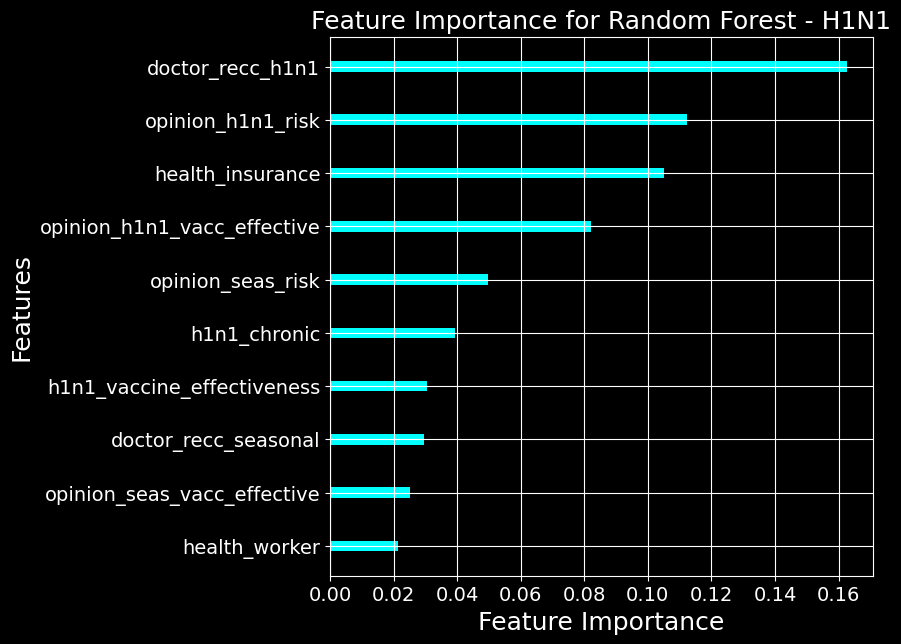

In [62]:
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(7,7))
plt.style.use('dark_background')
plt.barh(range(len(indices)), importances[indices], color="cyan", height=0.2, align='center')
plt.yticks(range(len(indices)), [X_h1n1_train.columns.values.tolist()[i] for i in indices], fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Feature Importance", fontsize=18)
plt.ylabel("Features", fontsize=18)
plt.title("Feature Importance for Random Forest - H1N1", fontsize=18)
plt.grid()
plt.show()

In [63]:
y_h1n1_pred = clf_h1n1.predict(X_h1n1_test)

In [64]:
print(X_h1n1_test)

false_predictions = np.where(y_h1n1_pred != y_h1n1_test)[0]

# Print the indices of false predictions and their corresponding true and predicted labels
for idx in false_predictions:
    print(f"Index: {idx}, True label: {y_h1n1_test.to_list()[idx]}, Predicted label: {y_h1n1_pred[idx]}")

      h1n1_concern  h1n1_knowledge  behavioral_face_mask  \
0              0.0             1.0                   0.0   
1              2.0             1.0                   0.0   
2              1.0             1.0                   0.0   
3              2.0             2.0                   0.0   
4              1.0             1.0                   0.0   
...            ...             ...                   ...   
5337           3.0             2.0                   0.0   
5338           1.0             1.0                   0.0   
5339           1.0             2.0                   0.0   
5340           1.0             2.0                   0.0   
5341           0.0             1.0                   0.0   

      behavioral_wash_hands  behavioral_large_gatherings  \
0                       0.0                          1.0   
1                       1.0                          1.0   
2                       1.0                          0.0   
3                       1.0            

In [65]:
y_h1n1_test_new = y_h1n1_test.to_list()
data_h1n1 = pd.concat([X_h1n1_test, pd.DataFrame(data={'Prediction': y_h1n1_pred, 'Actual': y_h1n1_test_new})], axis=1)
data_h1n1

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_nan,age_group,education,income_poverty,employment_status,h1n1_flu,h1n1_vaccine_effectiveness,h1n1_chronic,Prediction,Actual
0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,3.0,1.0,0.0,4.0,0.000000,0,1
1,2.0,1.0,0.0,1.0,1.0,1.0,0.000000,0.0,0.000000,0.0,...,0.0,1.0,3.0,0.0,0.0,2.0,8.0,0.000000,0,0
2,1.0,1.0,0.0,1.0,0.0,1.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,2.0,0.0,1.0,4.0,0.000000,0,0
3,2.0,2.0,0.0,1.0,0.0,1.0,1.000000,0.0,0.000000,1.0,...,0.0,0.0,2.0,1.0,0.0,4.0,5.0,0.000000,1,1
4,1.0,1.0,0.0,1.0,0.0,1.0,1.000000,0.0,0.000000,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,20.0,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5337,3.0,2.0,0.0,1.0,1.0,1.0,1.000000,1.0,0.000000,0.0,...,0.0,4.0,0.0,0.0,1.0,6.0,20.0,1.000000,1,0
5338,1.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,3.0,2.0,1.0,0.0,1.0,8.0,0.000000,0,0
5339,1.0,2.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.000000,0.0,...,0.0,2.0,3.0,1.0,1.0,2.0,20.0,0.000000,1,1
5340,1.0,2.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,...,0.0,4.0,0.0,3.0,1.0,2.0,3.0,0.000000,0,0


In [66]:
data_h1n1.iloc[:,[-2,-1]].to_csv("h1n1rf.csv", sep=",")

In [67]:
# False Negative
data_h1n1.query('Prediction==0 & Actual==1 ')

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_nan,age_group,education,income_poverty,employment_status,h1n1_flu,h1n1_vaccine_effectiveness,h1n1_chronic,Prediction,Actual
0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,3.0,1.0,0.0,4.000000,0.000000,0,1
45,1.0,1.0,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,1.0,8.000000,0.000000,0,1
73,2.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,4.0,0.0,1.0,0.0,2.0,16.000000,0.000000,0,1
102,3.0,0.0,0.0,1.0,1.0,1.0,0.220519,1.000000,0.000000,0.000000,...,0.0,4.0,1.0,3.0,1.0,0.0,4.000000,0.220519,0,1
117,2.0,1.0,1.0,1.0,1.0,0.0,0.000000,1.000000,0.000000,0.000000,...,1.0,4.0,3.0,0.0,0.0,2.0,4.000000,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235,0.0,2.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,2.0,2.0,1.0,0.0,0.0,3.000000,0.000000,0,1
5241,1.0,2.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,2.0,2.0,1.0,0.0,2.0,5.000000,0.000000,0,1
5255,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,...,0.0,4.0,2.0,0.0,1.0,0.0,4.000000,0.000000,0,1
5295,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,...,0.0,4.0,2.0,3.0,1.0,0.0,16.000000,0.000000,0,1


In [68]:
# False Positive
data_h1n1.query('Prediction==1 & Actual==0 ')

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_nan,age_group,education,income_poverty,employment_status,h1n1_flu,h1n1_vaccine_effectiveness,h1n1_chronic,Prediction,Actual
4,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,20.0,0.0,1,0
7,3.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,3.0,3.0,3.0,0.0,6.0,10.0,1.0,1,0
14,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,4.0,2.0,0.0,1.0,1.0,5.0,0.0,1,0
20,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,3.0,2.0,0.0,0.0,4.0,5.0,0.0,1,0
21,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,1.0,0.0,0.0,1.0,10.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5303,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,2.0,0.0,0.0,2.0,16.0,0.0,1,0
5309,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,4.0,1.0,3.0,1.0,2.0,20.0,0.0,1,0
5310,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,2.0,0.0,1.0,4.0,10.0,0.0,1,0
5313,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,4.0,3.0,3.0,3.0,20.0,0.0,1,0


In [69]:
# True Positive
data_h1n1.query('Prediction==1 & Actual==1 ')

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_nan,age_group,education,income_poverty,employment_status,h1n1_flu,h1n1_vaccine_effectiveness,h1n1_chronic,Prediction,Actual
3,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,1.000000,...,0.0,0.0,2.0,1.0,0.0,4.0,5.000000,0.000000,1,1
6,3.0,2.0,0.0,0.0,1.0,1.0,1.0,0.283188,0.082855,0.111031,...,1.0,4.0,4.0,3.0,3.0,6.0,15.000000,0.283188,1,1
19,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.283188,0.082855,0.111031,...,1.0,4.0,4.0,3.0,3.0,0.0,7.055175,0.283188,1,1
23,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,...,0.0,3.0,2.0,3.0,0.0,4.0,20.000000,0.000000,1,1
24,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,...,0.0,1.0,2.0,1.0,0.0,2.0,20.000000,0.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,...,0.0,2.0,2.0,3.0,0.0,4.0,10.000000,0.000000,1,1
5317,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,1.000000,...,0.0,0.0,2.0,1.0,0.0,4.0,10.000000,0.000000,1,1
5320,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,...,0.0,2.0,2.0,1.0,0.0,4.0,25.000000,0.000000,1,1
5327,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.000000,1.000000,...,0.0,3.0,3.0,1.0,0.0,4.0,4.000000,0.000000,1,1


In [70]:
# True Negative
data_h1n1.query('Prediction==0 & Actual==0 ')

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_nan,age_group,education,income_poverty,employment_status,h1n1_flu,h1n1_vaccine_effectiveness,h1n1_chronic,Prediction,Actual
1,2.0,1.0,0.0,1.0,1.0,1.0,0.000000,0.0,0.000000,0.0,...,0.0,1.0,3.0,0.0,0.0,2.0,8.0,0.000000,0,0
2,1.0,1.0,0.0,1.0,0.0,1.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,2.0,0.0,1.0,4.0,0.000000,0,0
5,1.0,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,2.0,1.0,3.0,0.000000,0,0
8,2.0,2.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,...,0.0,3.0,2.0,1.0,2.0,4.0,4.0,0.000000,0,0
9,2.0,2.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.000000,0.0,...,0.0,4.0,2.0,0.0,1.0,4.0,8.0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,1.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,...,0.0,0.0,3.0,0.0,0.0,2.0,4.0,0.000000,0,0
5336,2.0,1.0,0.0,1.0,0.0,1.0,0.000000,0.0,0.000000,0.0,...,0.0,4.0,3.0,1.0,1.0,2.0,6.0,0.000000,0,0
5338,1.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,3.0,2.0,1.0,0.0,1.0,8.0,0.000000,0,0
5340,1.0,2.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,...,0.0,4.0,0.0,3.0,1.0,2.0,3.0,0.000000,0,0


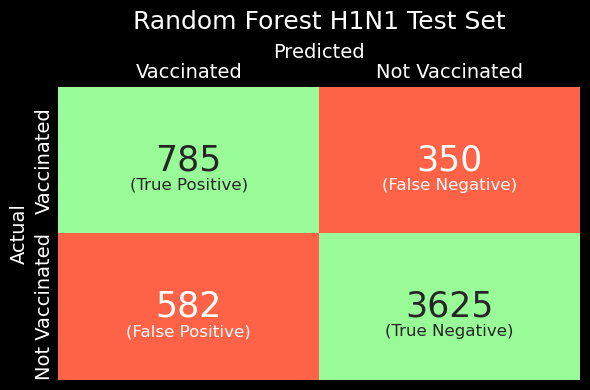

In [71]:
cm_h1n1 = confusion_matrix(y_h1n1_test, y_h1n1_pred)
confusion_matrix_plotting(np.flip(cm_h1n1), "Random Forest H1N1 Test Set")

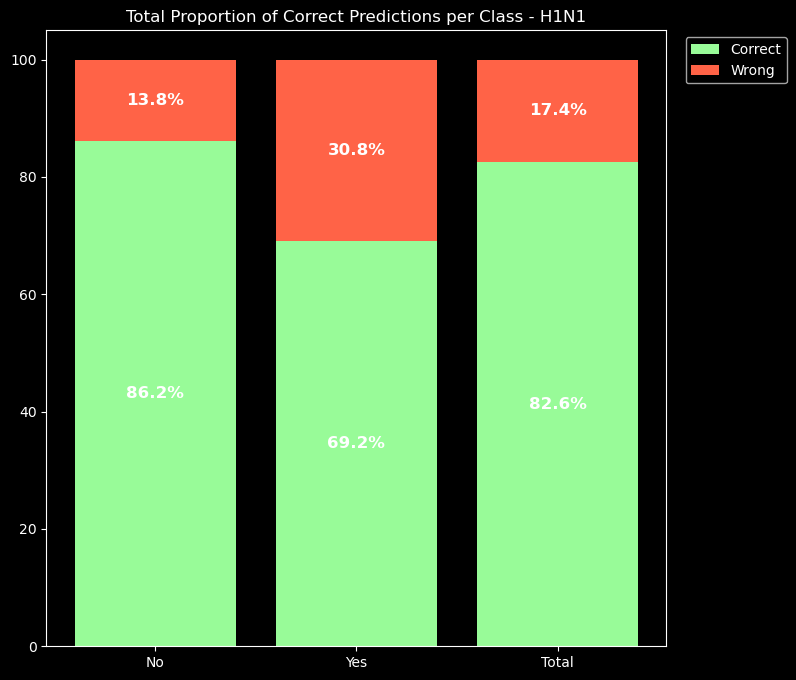

In [72]:
tn = cm_h1n1[0][0]
fp = cm_h1n1[0][1]

fn = cm_h1n1[1][0]
tp = cm_h1n1[1][1]

negative = tn + fp
positive = tp + fn

total = tn + fp + tp + fn

no_weights = []
no_weights.append((fp/negative)*100)
no_weights.append((fn/positive)*100)
no_weights.append(((fn+fp)/total)*100)

yes_weights = []
yes_weights.append((tn/negative)*100)
yes_weights.append((tp/positive)*100)
yes_weights.append(((tn+tp)/total)*100)


species = (
    "No",
    "Yes",
    "Total",
)
weight_counts = {
    "Correct": yes_weights,
    "Wrong": no_weights,

}

fig, ax = plt.subplots(1,1,figsize=(8,8))
bottom = np.zeros(3)

j = 0

colors = ['palegreen', 'tomato']

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, label=boolean, bottom=bottom, color=colors[j])
    
    for i, rect in enumerate(p):
        height = rect.get_height()
        if height >= 0:
            ax.text(rect.get_x() + rect.get_width() / 2, 
                    bottom[i] + height / 2, 
                    "{:.1f}%".format(height),
                    ha='center', 
                    va='center',
                   fontsize=12,
                   weight="bold")
    
    bottom += weight_count
    j += 1

ax.set_title("Total Proportion of Correct Predictions per Class - H1N1")
ax.legend(bbox_to_anchor=(1.02, 1))
ax.set_yticks(ticks=[0, 20, 40, 60, 80, 100])
plt.show()

In [73]:
sensitivity = np.round(tp / (tp+fn),4)
print("Sensitivity: " + str(sensitivity))

Sensitivity: 0.6916


In [74]:
specificity = np.round(tn / (tn+fp),4)
print("Specificity: " + str(specificity))

Specificity: 0.8617


In [75]:
print(classification_report(y_h1n1_test, y_h1n1_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      4207
           1       0.57      0.69      0.63      1135

    accuracy                           0.83      5342
   macro avg       0.74      0.78      0.76      5342
weighted avg       0.84      0.83      0.83      5342



0.8602695947283162


<Figure size 700x700 with 0 Axes>

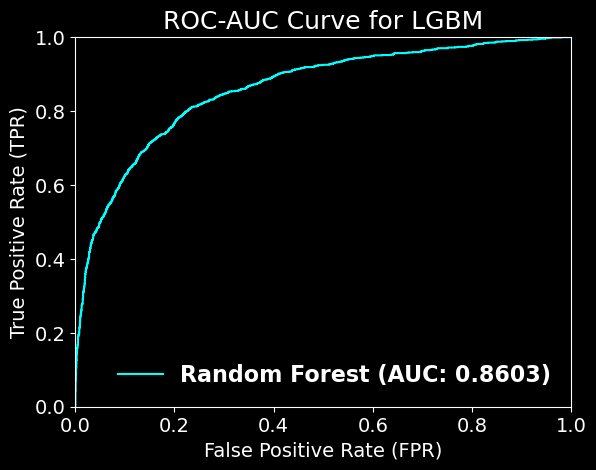

In [76]:
y_h1n1_pred_proba = clf_h1n1.predict_proba(X_h1n1_test)
plt.style.use('dark_background')
plt.figure(figsize=(7,7))
fpr1, tpr1, threshold1 = roc_curve(y_h1n1_test, y_h1n1_pred_proba[:,1])
roc_auc = metrics.auc(fpr1, tpr1)
print(roc_auc)
display = RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=np.round(roc_auc,4))
display.plot(color="cyan")
plt.grid(False)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.title("ROC-AUC Curve for LGBM", fontsize=18)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14)
legend_properties = {'size': 16, 'weight':'bold'}
plt.legend(loc=4, labels=['Random Forest (AUC: ' + str(np.round(roc_auc,4)) + ")"], prop=legend_properties, frameon=False)
plt.show()

In [77]:
a = X_seasonal
b = y_seasonal

# transform the train by using the data cleaning stuff above to fill in missing data and create dummy variables
processed_data = preprocessor_seasonal.fit_transform(a, b)

# Get the feature names for the transformed data
categorical_feature_names = preprocessor_seasonal.named_transformers_['cat']\
                    .named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numeric feature names with categorical feature names
all_feature_names = numeric_features + list(categorical_feature_names) + ordinal_features

# Convert the processed data array back into a DataFrame
X_seasonal = pd.DataFrame(processed_data, columns=all_feature_names)

X_seasonal["seasonal_vaccine_effectiveness"] = X_seasonal["opinion_seas_vacc_effective"]*X_seasonal["opinion_seas_sick_from_vacc"]
X_seasonal["seasonal_household"]=X_seasonal["household_children"]*X_seasonal["household_adults"]

X_seasonal = X_seasonal.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

X_seasonal = X_seasonal.loc[:,~X_seasonal.columns.duplicated()].copy()

In [78]:
a = X_h1n1
b = y_h1n1

# transform the train by using the data cleaning stuff above to fill in missing data and create dummy variables
processed_data = preprocessor_h1n1.fit_transform(a, b)

# Get the feature names for the transformed data
categorical_feature_names = preprocessor_h1n1.named_transformers_['cat']\
                    .named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numeric feature names with categorical feature names
all_feature_names = numeric_features + list(categorical_feature_names) + ordinal_features

# Convert the processed data array back into a DataFrame
X_h1n1 = pd.DataFrame(processed_data, columns=all_feature_names)

X_h1n1["h1n1_flu"] = X_h1n1["h1n1_concern"]*X_h1n1["h1n1_knowledge"]
X_h1n1["h1n1_vaccine_effectiveness"] = X_h1n1["opinion_h1n1_vacc_effective"]*X_h1n1["opinion_h1n1_sick_from_vacc"]
X_h1n1["h1n1_chronic"] = X_h1n1["chronic_med_condition"]*X_h1n1["doctor_recc_h1n1"]

X_h1n1 = X_h1n1.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

X_h1n1 = X_h1n1.loc[:,~X_h1n1.columns.duplicated()].copy()

In [79]:
clf_seasonal.fit(X_seasonal, y_seasonal)

RandomForestClassifier(class_weight='balanced', max_depth=14, max_features=0.19,
                       max_samples=0.9500000000000001, min_samples_split=10,
                       n_estimators=800, n_jobs=-1, random_state=42)

In [80]:
clf_seasonal.feature_importances_

array([0.01451165, 0.01531108, 0.00354215, 0.0045766 , 0.00464706,
       0.00682798, 0.02138048, 0.01231118, 0.00394712, 0.01324753,
       0.01896338, 0.02207671, 0.02833323, 0.01276678, 0.12276015,
       0.14250368, 0.14158869, 0.02096138, 0.01044473, 0.01194119,
       0.00488283, 0.00347406, 0.00482328, 0.00364753, 0.00413312,
       0.00268317, 0.00440801, 0.00407368, 0.00369678, 0.00435904,
       0.0036796 , 0.00410205, 0.00383315, 0.00448626, 0.00431177,
       0.00455336, 0.0027188 , 0.00181014, 0.00117233, 0.00091096,
       0.00777861, 0.00406784, 0.00209238, 0.00087681, 0.00226405,
       0.00078589, 0.00097319, 0.00050965, 0.00197296, 0.00017311,
       0.00171758, 0.00127998, 0.00183459, 0.00103544, 0.00276546,
       0.00171729, 0.00196602, 0.00408187, 0.00142713, 0.00113669,
       0.00471085, 0.004091  , 0.00092972, 0.00235077, 0.00118854,
       0.00189111, 0.00087139, 0.00152559, 0.00283068, 0.0010471 ,
       0.00047414, 0.00153262, 0.00082826, 0.00125514, 0.00124

In [81]:
clf_h1n1.fit(X_h1n1, y_h1n1)

RandomForestClassifier(class_weight='balanced', max_depth=14,
                       max_features=0.15000000000000002, max_samples=0.92,
                       min_samples_split=20, n_estimators=550, n_jobs=-1,
                       random_state=42)

In [82]:
clf_h1n1.feature_importances_

array([1.13414645e-02, 1.13366807e-02, 3.88251266e-03, 3.75687945e-03,
       4.06655238e-03, 4.13935707e-03, 1.65882022e-01, 6.56607062e-03,
       4.30935811e-03, 2.10273374e-02, 1.08062346e-01, 8.59100330e-02,
       1.09915939e-01, 1.07376865e-02, 3.03428974e-02, 2.52775142e-02,
       5.04312562e-02, 1.08212607e-02, 9.01952739e-03, 8.11934001e-03,
       4.45369897e-03, 3.97513400e-03, 4.36487118e-03, 2.78488703e-03,
       3.61571469e-03, 2.53841604e-03, 3.59032081e-03, 3.39852925e-03,
       2.77392034e-03, 4.43778943e-03, 3.68452474e-03, 3.02486941e-03,
       3.23790018e-03, 3.56675473e-03, 3.48926304e-03, 3.61177417e-03,
       2.37697844e-03, 1.76641598e-03, 1.11164728e-03, 7.37102010e-04,
       1.13128156e-02, 5.18110677e-03, 1.99455487e-03, 8.87336270e-04,
       1.44881292e-03, 5.80802326e-04, 8.46090060e-04, 4.12651343e-04,
       2.14310167e-03, 6.94833899e-05, 1.09324003e-03, 8.16479842e-04,
       1.06121313e-03, 8.59012719e-04, 2.56863267e-03, 1.30685434e-03,
      

In [83]:
test = pd.read_csv("test_set_features.csv")

In [84]:
test.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [85]:
test.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26708.000000,26623.000000,26586.000000,26629.000000,26495.000000,26689.000000,26668.000000,26636.000000,26626.000000,26580.000000,...,25919.000000,14480.000000,26310.000000,26328.000000,26333.000000,26256.000000,26209.000000,26187.000000,26483.000000,26483.000000
mean,40060.500000,1.623145,1.266042,0.049645,0.729798,0.069279,0.826084,0.351517,0.337227,0.683747,...,0.111501,0.887914,3.844622,2.326838,2.360612,4.024832,2.708688,2.143392,0.894310,0.543745
std,7710.079831,0.902755,0.615617,0.217215,0.444072,0.253934,0.379045,0.477453,0.472772,0.465022,...,0.314758,0.315483,1.007570,1.275636,1.359413,1.083204,1.376045,1.339102,0.754244,0.935057
min,26707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,33383.750000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,40060.500000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,46737.250000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,53414.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [86]:
test.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [87]:
# here apply the same data cleaning process to the test data set 
a = test.drop(columns=['respondent_id'], axis=1)

# transform the train by using the data cleaning stuff above to fill in missing data and create dummy variables
processed_data =preprocessor_seasonal.transform(a)

# Get the feature names for the transformed data
categorical_feature_names = preprocessor_seasonal.named_transformers_['cat']\
                    .named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numeric feature names with categorical feature names
all_feature_names = numeric_features + list(categorical_feature_names) + ordinal_features

# Convert the processed data array back into a DataFrame
processed_df_seasonal = pd.DataFrame(processed_data, columns=all_feature_names)

processed_df_seasonal["seasonal_vaccine_effectiveness"] = processed_df_seasonal["opinion_seas_vacc_effective"]*processed_df_seasonal["opinion_seas_sick_from_vacc"]
processed_df_seasonal["seasonal_household"]=processed_df_seasonal["household_children"]*processed_df_seasonal["household_adults"]

processed_df_seasonal = processed_df_seasonal.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

processed_df_seasonal = processed_df_seasonal.loc[:,~processed_df_seasonal.columns.duplicated()].copy()

In [88]:
prediction_seasonal = clf_seasonal.predict_proba(processed_df_seasonal)

In [89]:
# here apply the same data cleaning process to the test data set 
a = test.drop(columns=['respondent_id'], axis=1)

processed_data = preprocessor_h1n1.fit_transform(a)

# Get the feature names for the transformed data
categorical_feature_names = preprocessor_h1n1.named_transformers_['cat']\
                    .named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numeric feature names with categorical feature names
all_feature_names = numeric_features + list(categorical_feature_names) + ordinal_features

# Convert the processed data array back into a DataFrame
processed_df_h1n1 = pd.DataFrame(processed_data, columns=all_feature_names)

processed_df_h1n1["h1n1_flu"] = processed_df_h1n1["h1n1_concern"]*processed_df_h1n1["h1n1_knowledge"]
processed_df_h1n1["h1n1_vaccine_effectiveness"] = processed_df_h1n1["opinion_h1n1_vacc_effective"]*processed_df_h1n1["opinion_h1n1_sick_from_vacc"]
processed_df_h1n1["h1n1_chronic"] = processed_df_h1n1["chronic_med_condition"]*processed_df_h1n1["doctor_recc_h1n1"]

processed_df_h1n1 = processed_df_h1n1.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

processed_df_h1n1 = processed_df_h1n1.loc[:,~processed_df_h1n1.columns.duplicated()].copy()

In [90]:
prediction_h1n1 = clf_h1n1.predict_proba(processed_df_h1n1)

In [91]:
d = {'respondent_id': test['respondent_id']}

In [92]:
df = pd.DataFrame(data=d)

In [93]:
df['h1n1_vaccine'] = prediction_h1n1[:,1]

In [94]:
df['seasonal_vaccine'] = prediction_seasonal[:,1]

In [95]:
df.to_csv('rf.csv', sep=",", index=False)